In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pickle
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns
from numba import njit
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec

sns.set()

cmap = "viridis"

In [2]:
with open("data/GODM_230825_0.p", "rb") as fp:
    out_dict_nu = pickle.load(fp)
print(out_dict_nu.keys())

with open("data/GODM_3target_231008.p", "rb") as fp:
    out_dict_3way = pickle.load(fp)
print(out_dict_3way.keys())

dict_keys(['bias', 'pos', 'nu', 'num_runs', 'weights_mult', 'v_mult'])
dict_keys(['trajectories', 'nu', 'bias_mult', 'v_mult', 'weights_mult'])


In [3]:
nu_vals = out_dict_nu['nu']
run_list = out_dict_nu['pos']
num_runs = out_dict_nu['num_runs']
plot_inds = [1, 3, 5, 9]

(10, 8)


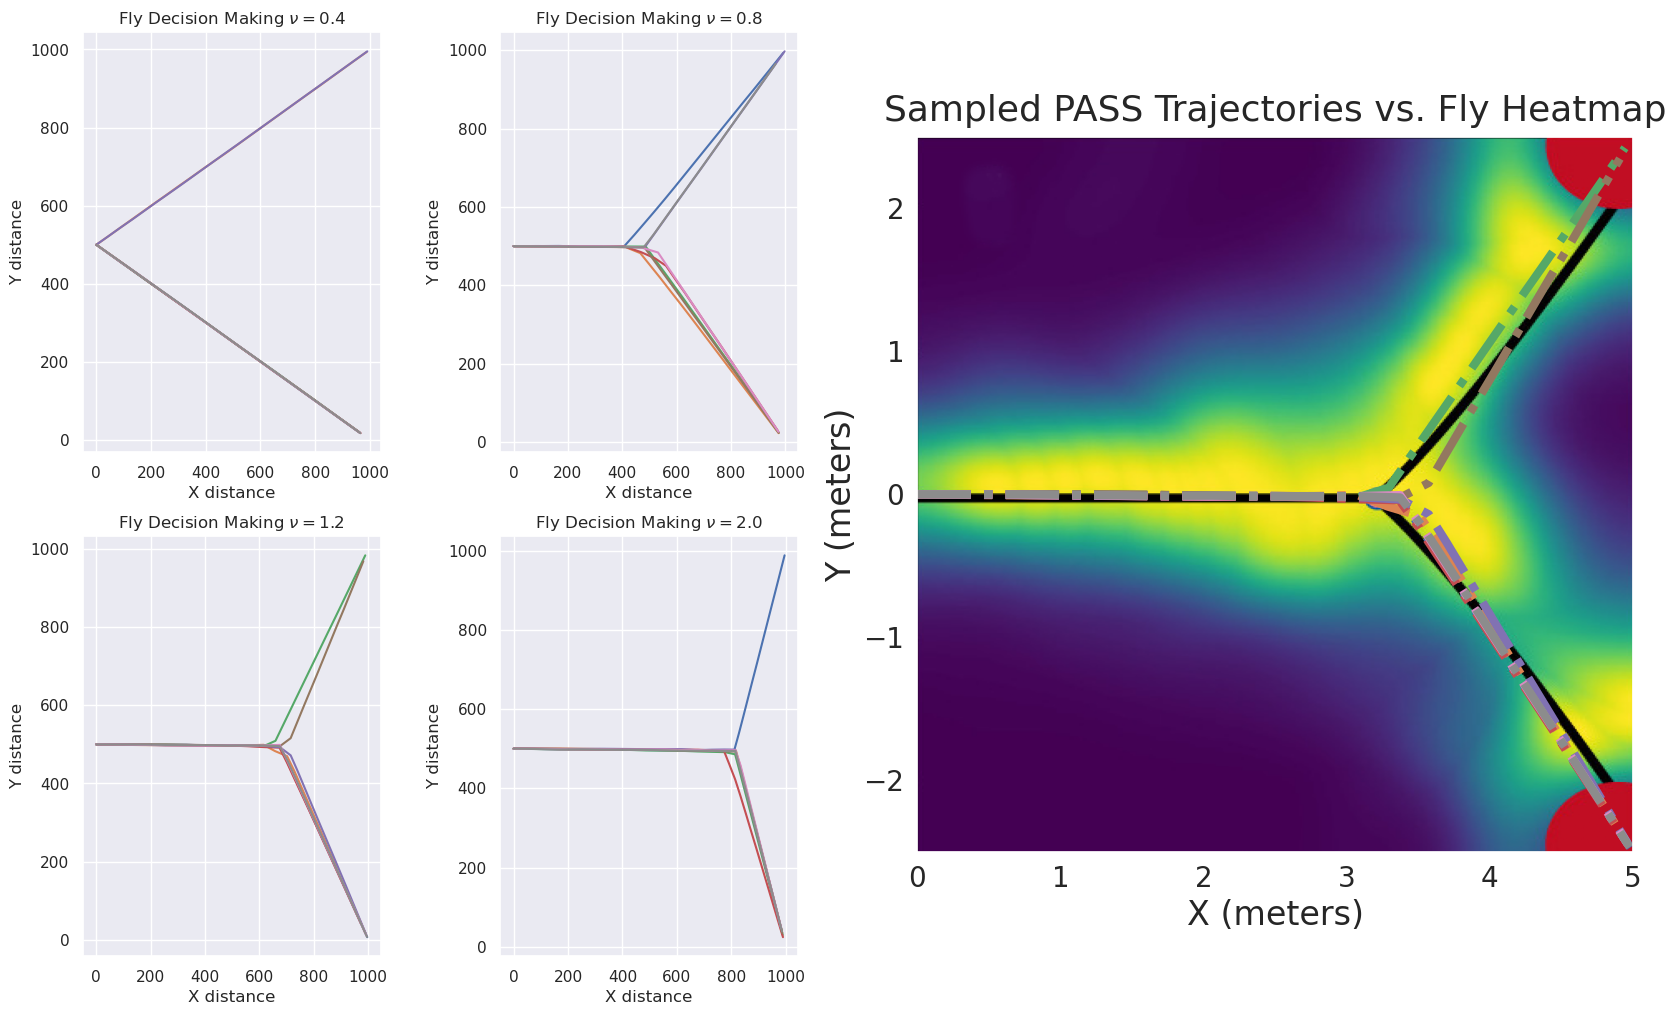

In [4]:
# Create a figure with a 2x4 grid layout
    
fig = plt.figure(figsize=(20, 12))

# Set up a grid with 2 rows, 4 columns and spacing between subplots
gs = GridSpec(2, 4, figure=fig, wspace=0.4)

# Create 4 subplots in a 2x2 grid on the left side
ax = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]),]

# Define noise parameter values and reshape trajectory data
nu_vals = np.arange(0.2, 2.2, 0.2)
run_list = np.array(run_list)
print(run_list.shape)

plt.subplots_adjust(wspace=0.2)

# Plot individual trajectories for different noise values
for i, val in enumerate(plot_inds):
    # Plot multiple runs for each noise value
    for j in range(num_runs):
        ax[i].plot(np.array(run_list[val, j])[:, 1], np.array(run_list[val, j])[:, 0], 
                  label="Iter:{0}".format(i))
    ax[i].set_xlabel("X distance")
    ax[i].set_ylabel("Y distance") 
    ax[i].set_title(r"Fly Decision Making $\nu={0:.1f}$".format(nu_vals[val]))

# Create large subplot on right side spanning both rows
ax_large = fig.add_subplot(gs[:, 2:])

# Load and display fly heatmap
heatmap = plt.imread("data/fly_heatmap.png")
ax_large.imshow(heatmap, extent=[0, 5, -2.5, 2.5])

# Overlay trajectories on heatmap
val = 5
for j in range(num_runs):
    # Scale and shift trajectories to match heatmap coordinates
    ax_large.plot(np.array(run_list[val, j])[:, 1]/200, 
                 np.array(run_list[val, j])[:, 0]/200 - 2.5,
                 linewidth=6, linestyle="-.")

# Format the large subplot
ax_large.tick_params(axis='both', which='major', labelsize=20)
ax_large.set_xlabel("X (meters)", fontsize=24)
ax_large.set_ylabel("Y (meters)", fontsize=24)
ax_large.set_title("Sampled PASS Trajectories vs. Fly Heatmap", fontsize=26, y=1.01)
ax_large.grid(visible=False)

(10, 8)


Text(0.5, 1.03, 'Sampled PASS Trajectories vs. Fly Heatmap \n 3 targets')

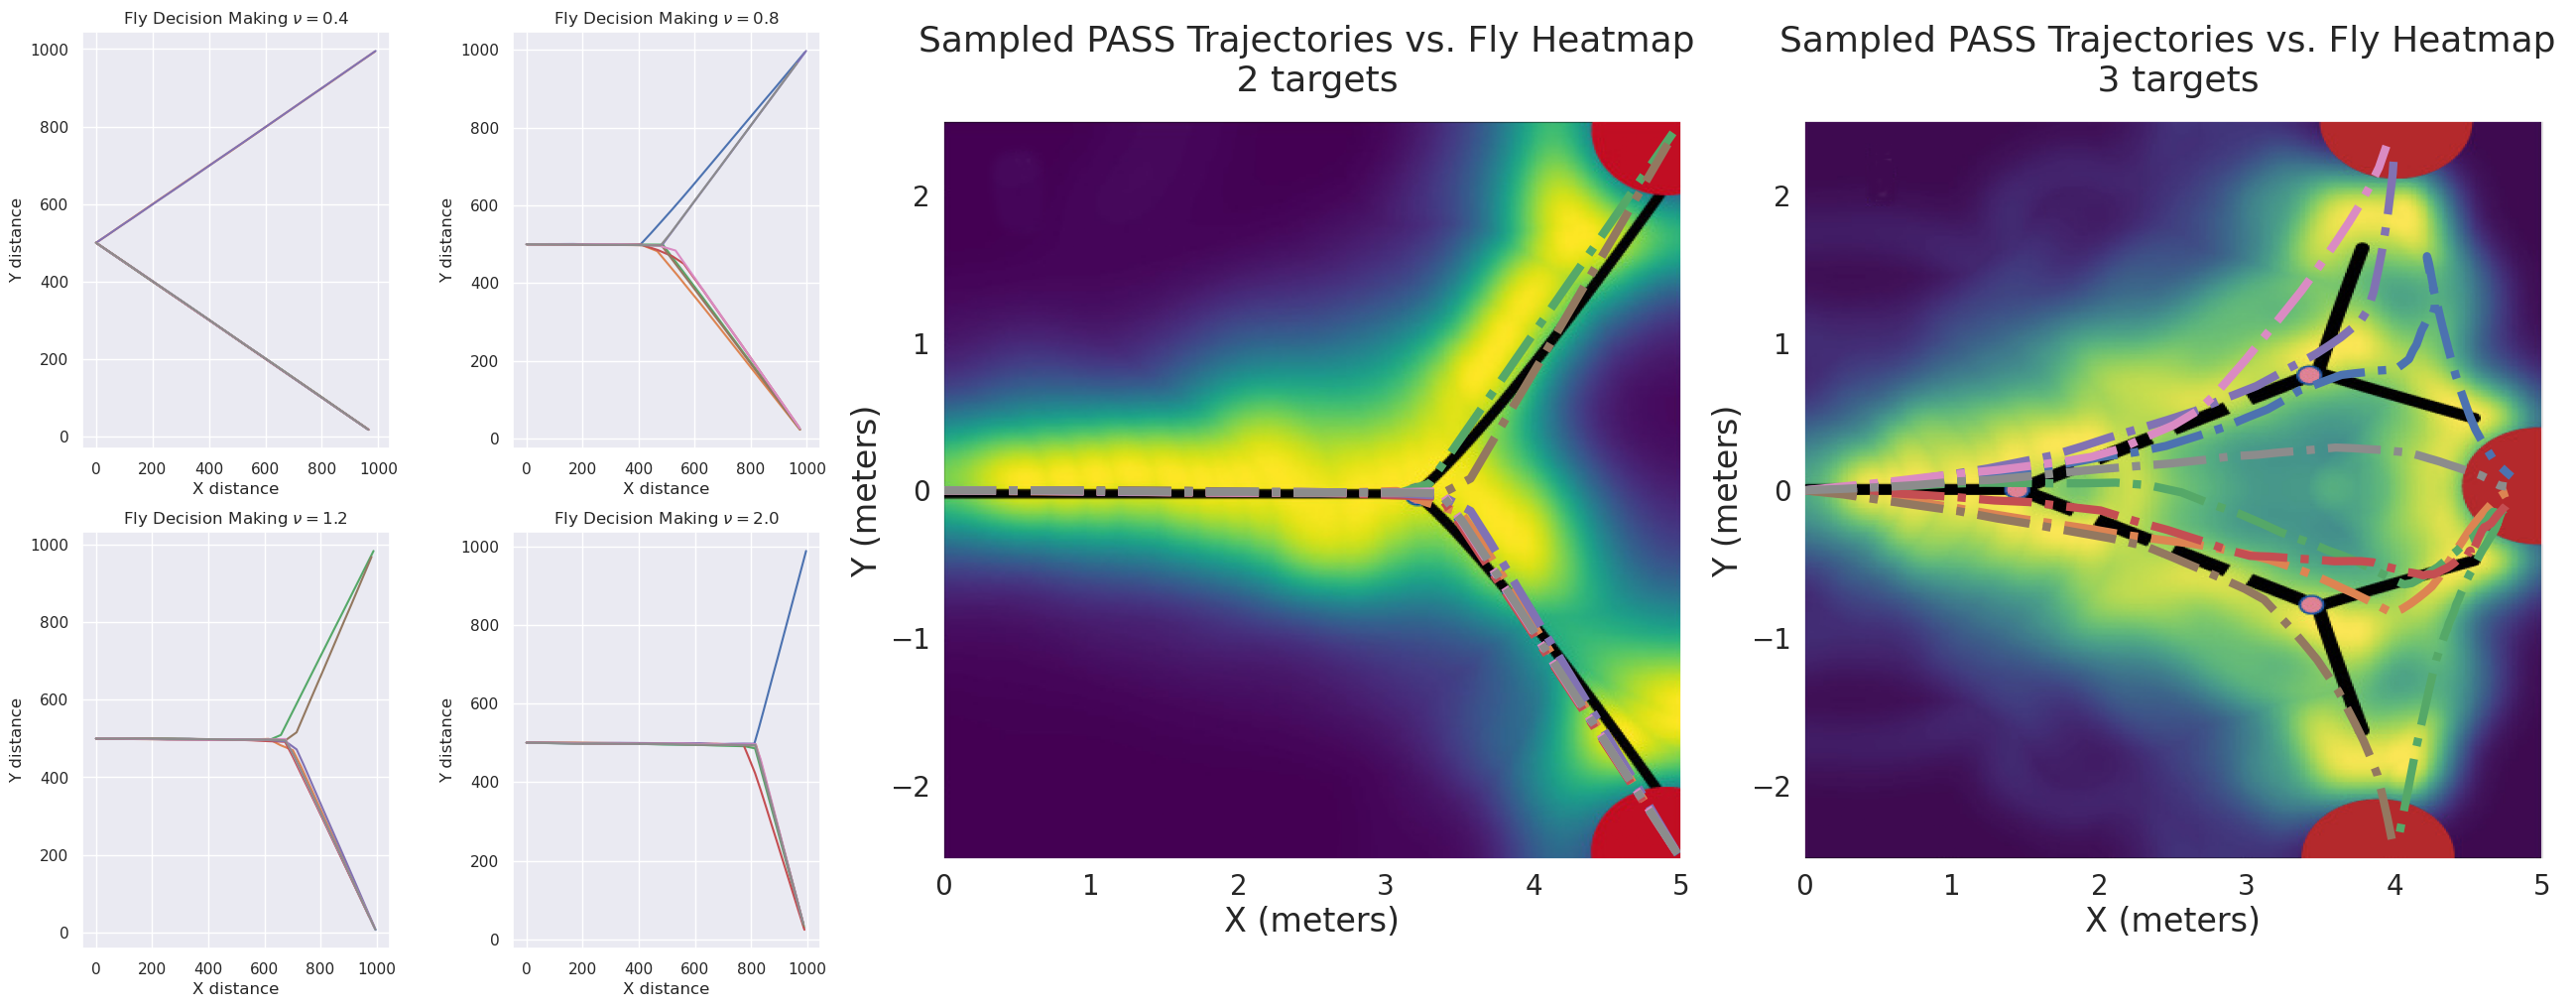

In [5]:
# Create large figure with specified size
fig = plt.figure(figsize=(32, 12))

# Set up grid layout with 2 rows, 6 columns and spacing between subplots
gs = GridSpec(2, 6, figure=fig, wspace=0.4)

# Create 4 subplots in a 2x2 grid on the left side
ax = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]),]

# Define noise parameter values and reshape trajectory data
nu_vals = np.arange(0.2, 2.2, 0.2)
run_list = np.array(run_list)
print(run_list.shape)

plt.subplots_adjust(wspace=0.2)

# Plot individual trajectories for different noise values
for i, val in enumerate(plot_inds):
    # Plot multiple runs for each noise value
    for j in range(num_runs):
        ax[i].plot(np.array(run_list[val, j])[:, 1], np.array(run_list[val, j])[:, 0], 
                  label="Iter:{0}".format(i))
    ax[i].set_xlabel("X distance")
    ax[i].set_ylabel("Y distance")
    ax[i].set_title(r"Fly Decision Making $\nu={0:.1f}$".format(nu_vals[val]))

# Create large subplot on middle spanning both rows
ax_large = fig.add_subplot(gs[:, 2:4])

# Load and display 2-target fly heatmap
heatmap = plt.imread("data/fly_heatmap.png")
ax_large.imshow(heatmap, extent=[0, 5, -2.5, 2.5])

# Overlay trajectories on 2-target heatmap
val = 5
for j in range(num_runs):
    # Scale and shift trajectories to match heatmap coordinates
    ax_large.plot(np.array(run_list[val, j])[:, 1]/200, 
                 np.array(run_list[val, j])[:, 0]/200 - 2.5,
                 linewidth=6, linestyle="-.")

# Format the middle subplot
ax_large.tick_params(axis='both', which='major', labelsize=20)
ax_large.set_xlabel("X (meters)", fontsize=24)
ax_large.set_ylabel("Y (meters)", fontsize=24)
ax_large.set_title("Sampled PASS Trajectories vs. Fly Heatmap \n 2 targets", fontsize=26, y=1.03)
ax_large.grid(visible=False)

# Create large subplot on right spanning both rows
ax_large3 = fig.add_subplot(gs[:, 4:])

# Load and display 3-target fly heatmap
heatmap3 = plt.imread("data/fly_heatmap_3way.png")
ax_large3.imshow(heatmap3, extent=[0, 5, -2.5, 2.5])

# Get trajectory data for 3-target case
traj_list = out_dict_3way["trajectories"][2][0][0]

# Plot subset of trajectories on 3-target heatmap for cleaner visualization
for traj in traj_list[:8]:
    ax_large3.plot(np.array(traj)[:, 1]/200, 
                  np.array(traj)[:, 0]/200 - 2.5,
                  linewidth=6, linestyle="-.")

# Format the right subplot
ax_large3.set_xlabel("X (meters)", fontsize=24)
ax_large3.set_ylabel("Y (meters)", fontsize=24)
ax_large3.tick_params(axis='both', which='major', labelsize=20)
ax_large3.grid(visible=False)
ax_large3.set_title("Sampled PASS Trajectories vs. Fly Heatmap \n 3 targets", fontsize=26, y=1.03)
# plt.savefig("GODM_bifurcations_3way.pdf", bbox_inches="tight")


In [6]:
with open("data/cal_dat.p", "rb") as fp:
    cal_dat = pickle.load(fp)

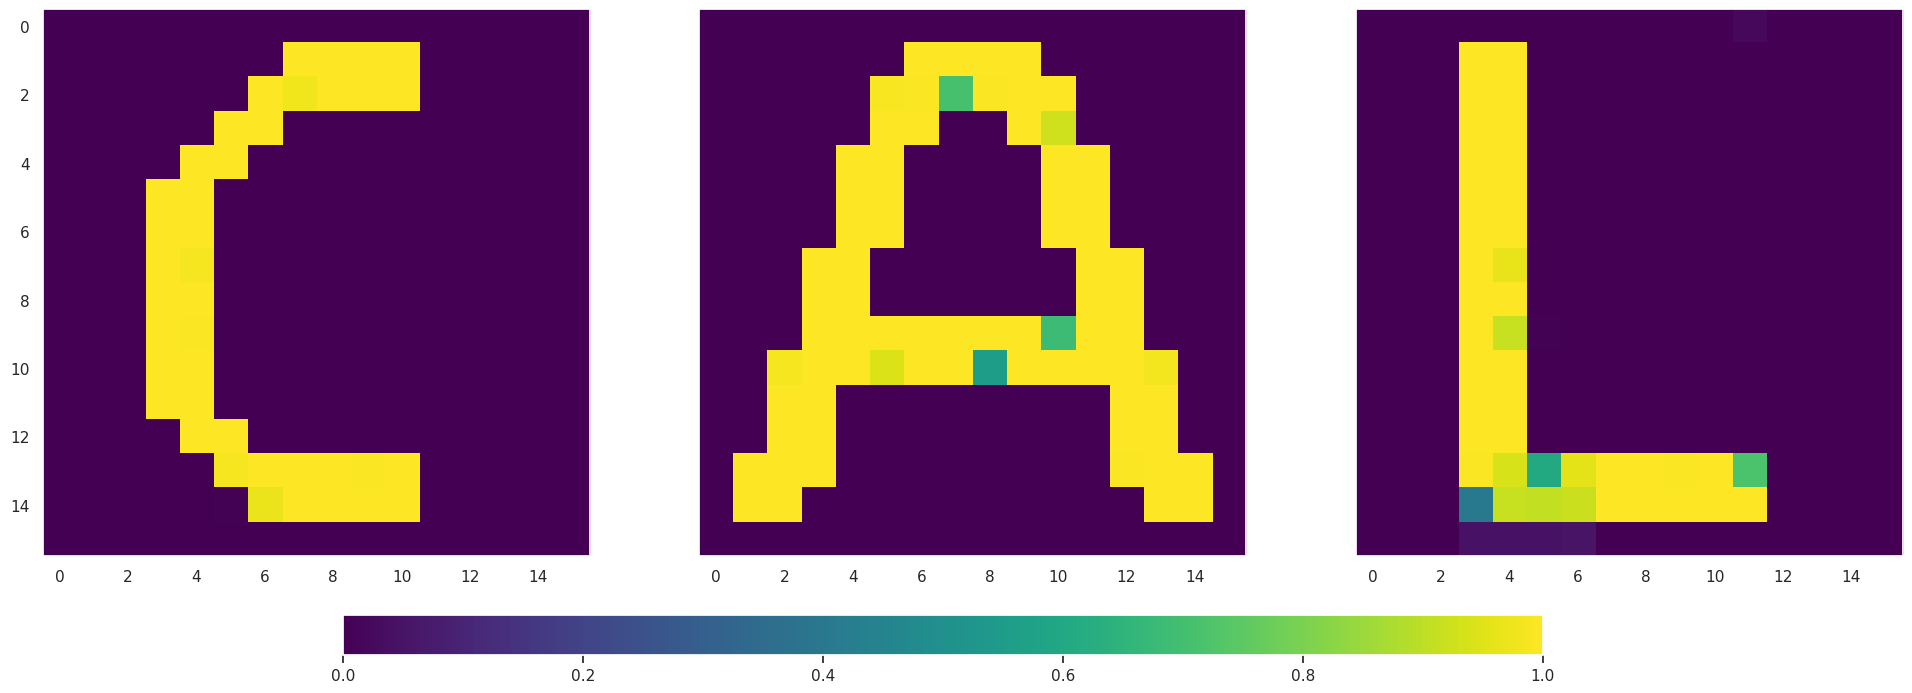

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharex=True, sharey=True)

out_dat_c = cal_dat["c_avg"]
out_dat_a = cal_dat["a_avg"]
out_dat_l = cal_dat["l_avg"]

im = ax0.imshow(out_dat_c, vmin=0, vmax=1, cmap=mpl.colormaps[cmap])
ax0.grid(visible=False)

#A generation
im = ax1.imshow(out_dat_a, vmin=0, vmax=1, cmap=mpl.colormaps[cmap])
ax1.grid(visible=False)

#L generation
im = ax2.imshow(out_dat_l, vmin=0, vmax=1, cmap=mpl.colormaps[cmap])
ax2.grid(visible=False)


fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal")

In [8]:
with open("data/tc_maxCUT_230126.p", "rb") as fp:
    data_dict = pickle.load(fp)

print(data_dict.keys())

dict_keys(['raw_outputs', 'avg_outputs', 'matrix', 'bias', 'Wmult'])


Text(0.5, 1.0, '4 Node MaxCUT Probability Distribution')

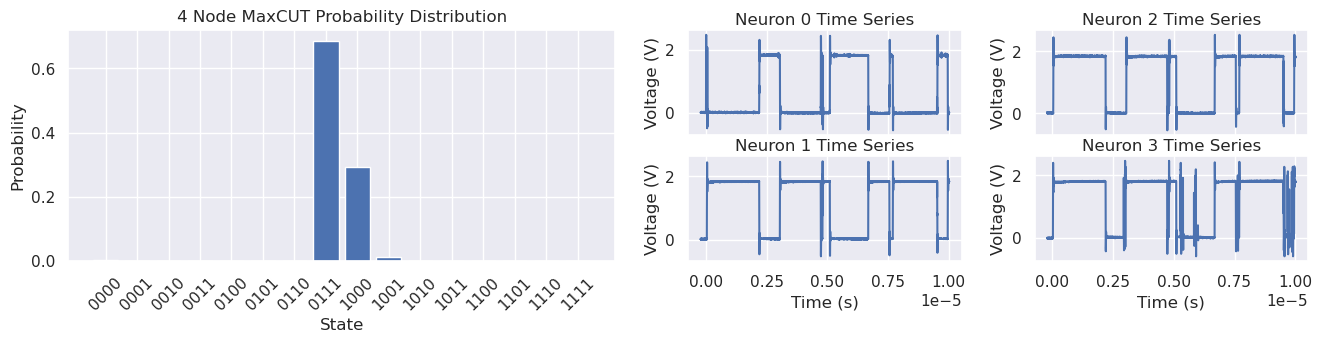

In [9]:
avg_vals_cleaned = dict(zip([format(x, "04b") for x in range(16)], [0]*16))

out_vals = []
out_avgs = []


thresh = 0.9
data_ind = 5

output = data_dict["raw_outputs"][data_ind]

for i, t in enumerate(output[0]):
    if t > 0:
        state = (output[1:, i] > thresh).astype(int)
        state_str = "".join(list(map(str, state)))
        avg_vals_cleaned[state_str] += 1


fig = plt.figure(figsize=(16, 3))

widths = [2, 1, 1]
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths)

fig.subplots_adjust()

for i in range(4):
    ax = fig.add_subplot(gs[i%2, i//2 + 1])
    ax.plot(output[0], output[i+1])
    ax.set_ylabel("Voltage (V)")
    # ax.text(x=0.8e-5, y=0.8, s="Node {0}".format(i), color="R", fontsize=12, fontweight="bold")
    ax.set_title("Neuron {0} Time Series".format(i), y=0.97)
    if i%2 == 0:
        ax.tick_params('x', labelbottom=False)
    else:
        ax.ticklabel_format(axis='x', scilimits=(0,0))
        ax.set_xlabel("Time (s)")


bar_ax = fig.add_subplot(gs[:, 0])

normalized_vals = np.array(list(avg_vals_cleaned.values()))/np.sum(list(avg_vals_cleaned.values()))
x=np.arange(2**4)
labels = list(avg_vals_cleaned.keys())
bar_ax.bar(x, height=normalized_vals)
bar_ax.set_xticks(x, minor=False)
bar_ax.set_xticklabels(labels, rotation=45)
bar_ax.set_xlabel("State")
bar_ax.set_ylabel("Probability")
bar_ax.set_title("4 Node MaxCUT Probability Distribution")

2.0000000000009973e-09


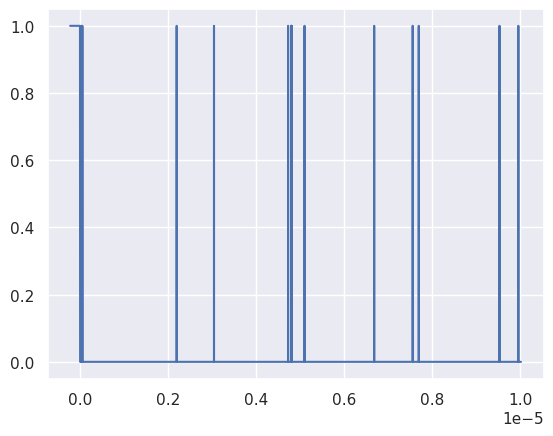

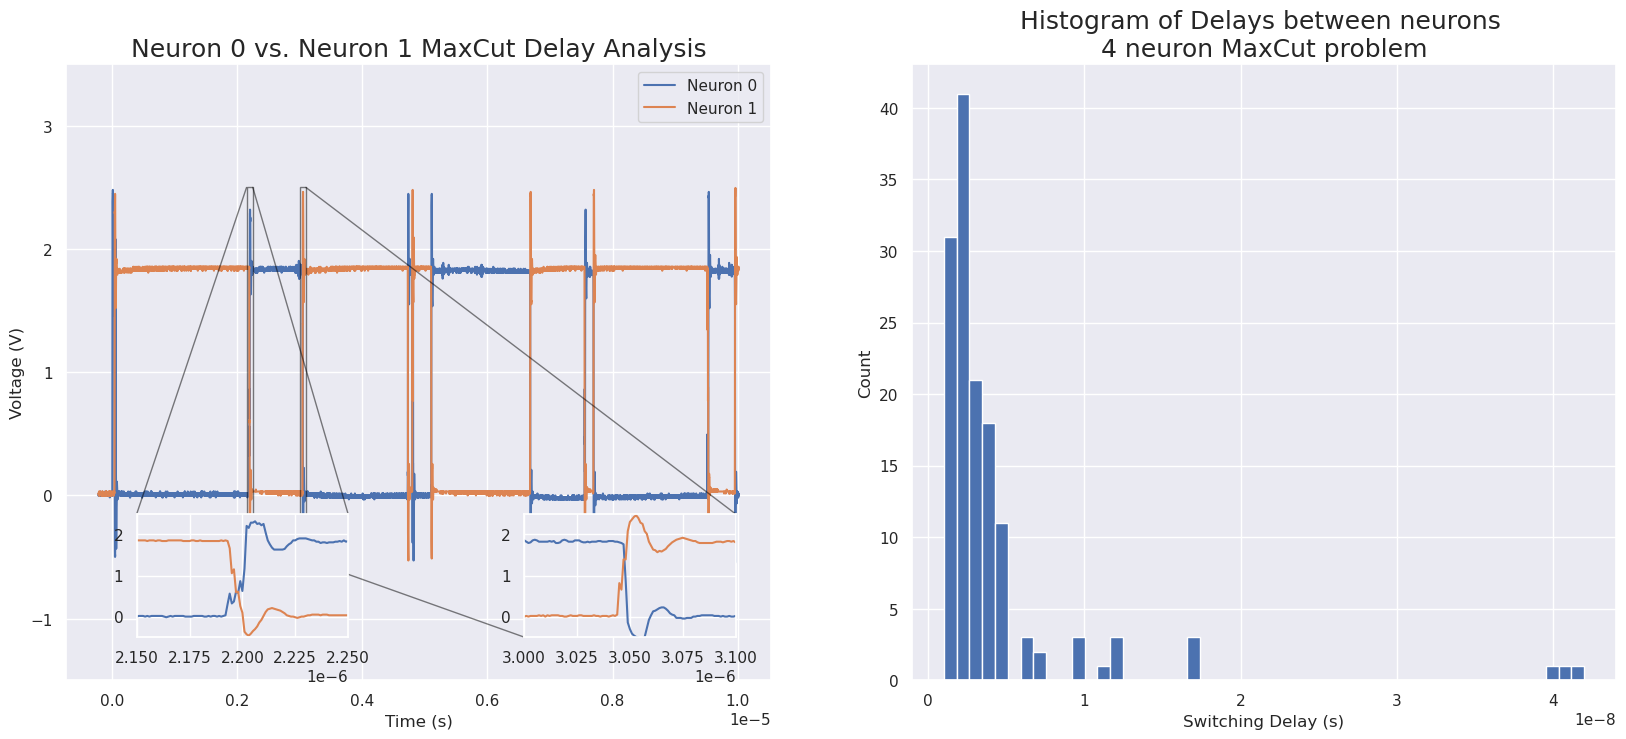

In [10]:
fig, ax = plt.subplots()

diff = np.zeros((6, len(output[0])))

gnd_state = [1, 0, 0, 0] 

ind = 0
for i in range(1, 5):
    for j in range(i+1,5):
        if gnd_state[i-1] == gnd_state[j-1]:
            diff[ind, :] += (output[i] > 0.9) ^ (output[j] > 0.9)
        else:
            diff[ind, :] += (output[i] > 0.9) ^ ~(output[j] > 0.9)
        ind += 1

trigger = False
trig_start = 0
delays = []
for diff_ind in range(6):
    for i in range(len(output[0])):
        if output[0][i] > 1e-6:
            if trigger:
                if diff[diff_ind][i] == 0:
                    trigger = False
                    delays.append(output[0][i] - trig_start)
            else:
                if diff[diff_ind][i] == 1:
                    trigger = True
                    trig_start = output[0][i]

ax.plot(output[0],diff[0])


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))



ax0.plot(output[0], output[1], label="Neuron 0")
ax0.plot(output[0], output[2], label="Neuron 1")
ax0.set_ylim([-1.5, 3.5])
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Voltage (V)")


x1, x2, y1, y2 = 0.215e-5, 0.225e-5, -0.5, 2.5  # subregion of the original image
axins0 = ax0.inset_axes(
    [0.1, 0.07, 0.3, 0.2],
    xlim=(x1, x2), ylim=(y1, y2))
axins0.plot(output[0], output[1])
axins0.plot(output[0], output[2])

ax0.indicate_inset_zoom(axins0, edgecolor="black")

x1, x2, y1, y2 = 0.3e-5, 0.31e-5, -0.5, 2.5  # subregion of the original image
axins1 = ax0.inset_axes(
    [0.65, 0.07, 0.3, 0.2],
    xlim=(x1, x2), ylim=(y1, y2))
axins1.plot(output[0], output[1])
axins1.plot(output[0], output[2])

ax0.indicate_inset_zoom(axins1, edgecolor="black")
ax0.set_title("Neuron 0 vs. Neuron 1 MaxCut Delay Analysis", fontsize=18)
ax0.legend()

ax1.hist(np.array(delays), bins=50)
ax1.set_xlabel("Switching Delay (s)")
ax1.set_ylabel("Count")
ax1.set_title("Histogram of Delays between neurons \n4 neuron MaxCut problem", fontsize=18)
# plt.savefig("MaxCut_Delay.pdf", bbox_inches="tight")
print(np.median(delays))

dict_keys(['Raw Output Trained', 'trained_weights', 'trained_bias', 'trained_probs', 'set_probs', 'Raw Output Set', 'tuned_weights', 'tuned_bias', 'tuned_probs'])


/tmp/ipykernel_18827/1415214272.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels([0] + list(data_dict['set_probs'].keys()))
/tmp/ipykernel_18827/1415214272.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([0] + list(data_dict['set_probs'].keys()))
/tmp/ipykernel_18827/1415214272.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([0] + list(data_dict['set_probs'].keys()))


Text(0.5, 0.98, 'On Chip AND Gate, 3 ways')

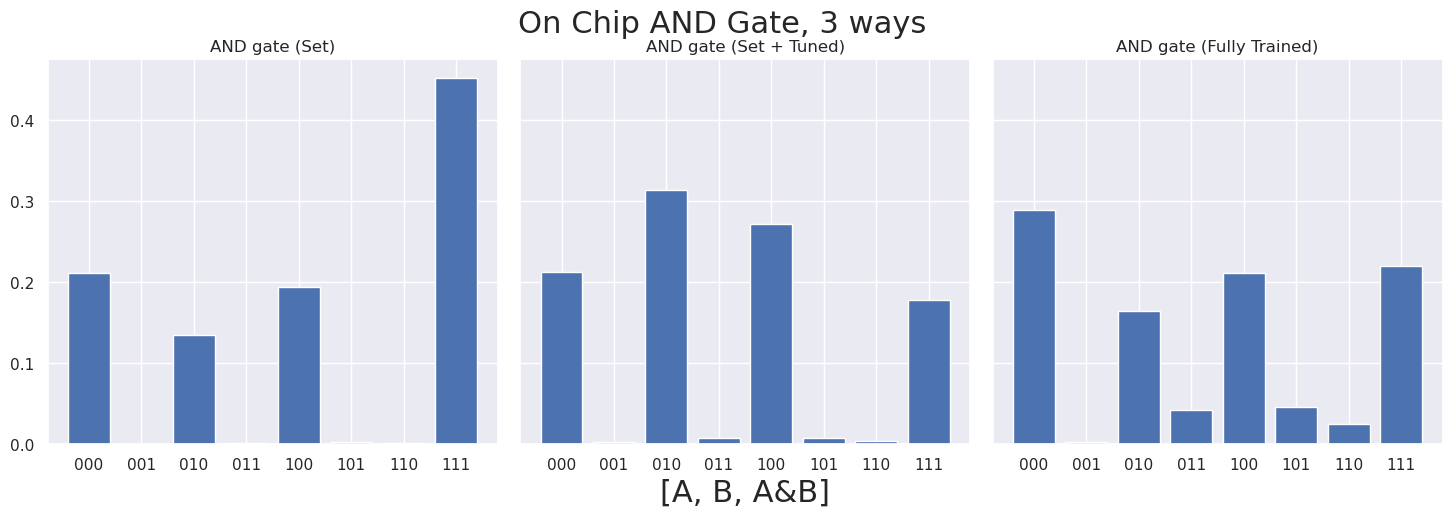

In [11]:
with open("data/tc_AND_trained_221213.p", "rb") as fp:
    data_dict = pickle.load(fp)
print(data_dict.keys())


fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(18, 5), sharey=True)
fig.subplots_adjust(wspace=0.05)

ax0_dat = np.array(list(data_dict['set_probs'].values()))
ax0_dat = ax0_dat / np.sum(ax0_dat)
ax0.bar(np.arange(8), height=ax0_dat)
ax0.set_xticklabels([0] + list(data_dict['set_probs'].keys()))
ax0.set_title("AND gate (Set)")

ax1_dat = np.array(list(data_dict['tuned_probs'].values()))
ax1_dat = ax1_dat / np.sum(ax1_dat)
ax1.bar(np.arange(8), height=ax1_dat)
ax1.set_xticklabels([0] + list(data_dict['set_probs'].keys()))
ax1.set_title("AND gate (Set + Tuned)")

ax2_dat = np.array(list(data_dict['trained_probs'].values()))
ax2_dat = ax2_dat / np.sum(ax2_dat)
ax2.bar(np.arange(8), height=ax2_dat)
ax2.set_xticklabels([0] + list(data_dict['set_probs'].keys()))
ax2.set_title("AND gate (Fully Trained)")

ax1.set_xlabel("[A, B, A&B]", fontsize=22)

fig.suptitle("On Chip AND Gate, 3 ways", fontsize=22)

In [12]:
with open('data/ScalingTest_SK_230121_SBM_hit.p', 'rb') as f:
    SBM_scaling_SK = pickle.load(f)
with open('data/ScalingTest_SK_230121_BM_hit.p', 'rb') as f:
    BM_scaling_SK = pickle.load(f)

with open('data/ScalingTest_MaxCut_240804_SBM_hit.p', 'rb') as f:
    SBM_scaling_MC = pickle.load(f)
with open('data/ScalingTest_MaxCut_240804_BM_hit.p', 'rb') as f:
    BM_scaling_MC = pickle.load(f)

In [13]:
eps = 1e-6
SBM_scaling_SK['solns'].shape
SBM_pcorr_SK = np.zeros(SBM_scaling_SK['solns'].shape[:-1])
for i, temp in enumerate(SBM_scaling_SK['temperature']):
    for j, samp in enumerate(SBM_scaling_SK['samps']):
        for k, n in enumerate(SBM_scaling_SK['n']):
            for l, prob_id in enumerate(SBM_scaling_SK['prob_id']):
                SBM_pcorr_SK[i, j, k, l] = np.count_nonzero(SBM_scaling_SK['solns'][i, j, k, l] > (1 - eps)) / SBM_scaling_SK['trials']

eps = 1e-6
BM_scaling_SK['solns'].shape
BM_pcorr_SK = np.zeros(BM_scaling_SK['solns'].shape[:-1])

for i, temp in enumerate(BM_scaling_SK['temperature']):
    for j, samp in enumerate(BM_scaling_SK['samps']):
        for k, n in enumerate(BM_scaling_SK['n']):
            for l, prob_id in enumerate(BM_scaling_SK['prob_id']):
                BM_pcorr_SK[i, j, k, l] = np.count_nonzero(BM_scaling_SK['solns'][i, j, k, l] > (1 - eps)) / BM_scaling_SK['trials']


In [14]:
eps = 1e-6
SBM_scaling_MC['solns'].shape
SBM_pcorr_MC = np.zeros(SBM_scaling_MC['solns'].shape[:-1])
for i, temp in enumerate(SBM_scaling_MC['temperature']):
    for j, samp in enumerate(SBM_scaling_MC['samps']):
        for k, n in enumerate(SBM_scaling_MC['n']):
            for l, prob_id in enumerate(SBM_scaling_MC['prob_id']):
                SBM_pcorr_MC[i, j, k, l] = np.count_nonzero(SBM_scaling_MC['solns'][i, j, k, l] > (1 - eps)) / SBM_scaling_MC['trials']

eps = 1e-6
BM_scaling_MC['solns'].shape
BM_pcorr_MC = np.zeros(BM_scaling_MC['solns'].shape[:-1])

for i, temp in enumerate(BM_scaling_MC['temperature']):
    for j, samp in enumerate(BM_scaling_MC['samps']):
        for k, n in enumerate(BM_scaling_MC['n']):
            for l, prob_id in enumerate(BM_scaling_MC['prob_id']):
                BM_pcorr_MC[i, j, k, l] = np.count_nonzero(BM_scaling_MC['solns'][i, j, k, l] > (1 - eps)) / BM_scaling_MC['trials']

In [15]:
fclk = 150e6 #Frequency in Mhz
samp_ind = -1

prob_compare_SBM_SK = np.median(SBM_pcorr_SK[:, :, :, :], axis=3)


prob_compare_SBM_SK = np.maximum(prob_compare_SBM_SK, 1e-12)
SBM_tsoln_SK = np.log(0.01) / (np.log(1 - prob_compare_SBM_SK))
SBM_tsoln_SK = np.maximum(SBM_tsoln_SK, 1)

# SBM_tsoln_SK = np.min()
for i, samp in enumerate(SBM_scaling_SK['samps']):

    SBM_tsoln_SK[:, i, :] = samp / fclk * SBM_tsoln_SK[:, i, :]



prob_compare_BM_SK = np.median(BM_pcorr_SK[:, :, :, :], axis=3)
prob_compare_BM_SK = np.maximum(prob_compare_BM_SK, 1e-12)

BM_tsoln_SK = np.log(0.01) / (np.log(1 - prob_compare_BM_SK))

BM_tsoln_SK = np.maximum(BM_tsoln_SK, 1)
for i, samp in enumerate(SBM_scaling_SK['samps']):

    BM_tsoln_SK[:, i, :] = samp / fclk * BM_tsoln_SK[:, i, :]

/tmp/ipykernel_18827/1230564109.py:8: RuntimeWarning: divide by zero encountered in log
  SBM_tsoln_SK = np.log(0.01) / (np.log(1 - prob_compare_SBM_SK))
/tmp/ipykernel_18827/1230564109.py:21: RuntimeWarning: divide by zero encountered in log
  BM_tsoln_SK = np.log(0.01) / (np.log(1 - prob_compare_BM_SK))


In [16]:
fclk = 150e6 #Frequency in Mhz
samp_ind = -1

prob_compare_SBM_MC = np.median(SBM_pcorr_MC[:, :, :, :], axis=3)


prob_compare_SBM_MC = np.maximum(prob_compare_SBM_MC, 1e-12)
SBM_tsoln_MC = np.log(0.01) / (np.log(1 - prob_compare_SBM_MC))
SBM_tsoln_MC = np.maximum(SBM_tsoln_MC, 1)

# SBM_tsoln_SK = np.min()
for i, samp in enumerate(SBM_scaling_MC['samps']):
    SBM_tsoln_MC[:, i, :] = samp / fclk * SBM_tsoln_MC[:, i, :]



prob_compare_BM_MC = np.median(BM_pcorr_MC[:, :, :, :], axis=3)
prob_compare_BM_MC = np.maximum(prob_compare_BM_MC, 1e-12)

BM_tsoln_MC = np.log(0.01) / (np.log(1 - prob_compare_BM_MC))

BM_tsoln_MC = np.maximum(BM_tsoln_MC, 1)
for i, samp in enumerate(BM_scaling_SK['samps']):

    BM_tsoln_MC[:, i, :] = samp / fclk * BM_tsoln_MC[:, i, :]

/tmp/ipykernel_18827/1921495506.py:8: RuntimeWarning: divide by zero encountered in log
  SBM_tsoln_MC = np.log(0.01) / (np.log(1 - prob_compare_SBM_MC))
/tmp/ipykernel_18827/1921495506.py:20: RuntimeWarning: divide by zero encountered in log
  BM_tsoln_MC = np.log(0.01) / (np.log(1 - prob_compare_BM_MC))


[2.38446093e-07 4.91801154e-07 1.49574467e-06 2.25117759e-06
 2.69441907e-06 4.04608080e-06 6.42235048e-06 1.07261167e-05
 1.13264202e-05 1.59592621e-05 2.20455830e-05 3.13894026e-05
 4.56802644e-05 6.30771386e-05 4.13567446e-05]
[1.31330220e-07 5.29998888e-07 1.52942288e-06 1.70271399e-06
 2.42223273e-06 4.57121214e-06 7.10933283e-06 8.27381825e-06
 1.34788685e-05 1.01953039e-05 2.87666147e-05 3.10883653e-05
 4.74159213e-05 4.91911737e-05 5.31352784e-05]
3.6 0.7999999999999998 1.5959262109832927e-05
2.6 0.7999999999999998 2.9e-05
1.6 0.7999999999999998 3e-05
0.6000000000000001 0.7999999999999998 0.0006
-0.3999999999999999 0.7999999999999998 0.003


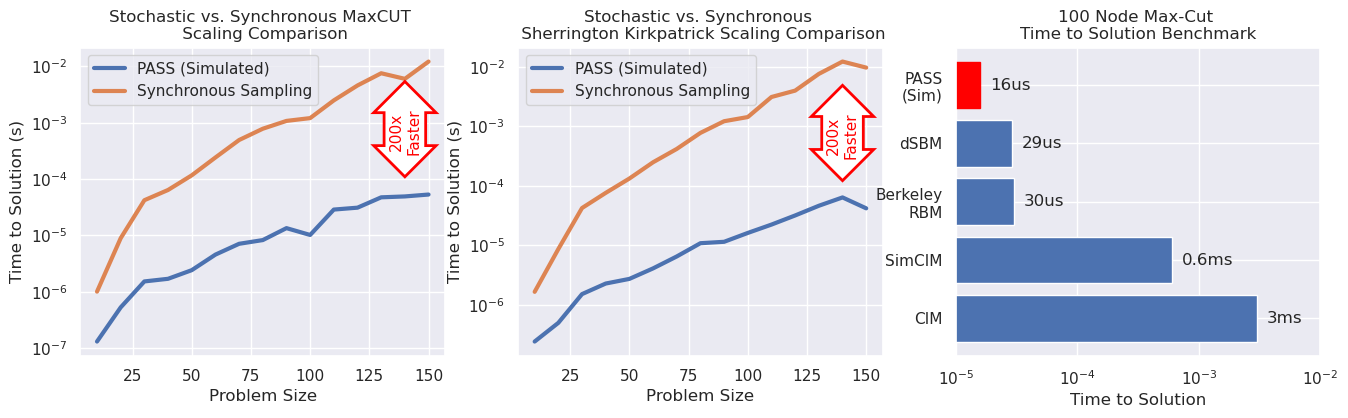

In [17]:
SBM_mintime_SK = np.min(SBM_tsoln_SK, axis=(0, 1))
BM_mintime_SK = np.min(BM_tsoln_SK, axis=(0, 1))

SBM_mintime_MC = np.min(SBM_tsoln_MC, axis=(0, 1))
BM_mintime_MC = np.min(BM_tsoln_MC, axis=(0, 1))
print(SBM_mintime_SK)
print(SBM_mintime_MC)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
fig.subplots_adjust(wspace=0.2)


ax[0].semilogy(SBM_scaling_MC["n"], SBM_mintime_MC, label="PASS (Simulated)", linewidth=3)
ax[0].semilogy(BM_scaling_MC["n"], BM_mintime_MC, label="Synchronous Sampling", linewidth=3)
ax[0].set_title("Stochastic vs. Synchronous MaxCUT \n Scaling Comparison", fontsize=12)
ax[0].set_xlabel("Problem Size")
ax[0].set_ylabel("Time to Solution (s)")
ax[0].legend()


ax[1].semilogy(SBM_scaling_SK["n"], SBM_mintime_SK, label="PASS (Simulated)", linewidth=3)
ax[1].semilogy(SBM_scaling_SK["n"], BM_mintime_SK, label="Synchronous Sampling", linewidth=3)
ax[1].set_title("Stochastic vs. Synchronous \n Sherrington Kirkpatrick Scaling Comparison", fontsize=12)
ax[1].set_xlabel("Problem Size")
ax[1].set_ylabel("Time to Solution (s)")
ax[1].legend()

# ax[0].arrow(x=140, dx=0, y=1e-4, )
# ax[0].annotate("", xy=(140, 1e-4), xytext=(140, 1e-2), xycoords='data', 
#                horizontalalignment='center', verticalalignment='top',
#                arrowprops=dict(linewidth=4, color='red', arrowstyle="<->"))


bbox_props = dict(boxstyle="darrow,pad=0.3", fc="white", ec="red", lw=2)
t = ax[0].text(140, 0.7e-3, "200x\nFaster", ha="center", va="center", color="red", rotation=90,
            size=11,
            bbox=bbox_props)



bbox_props = dict(boxstyle="darrow,pad=0.3", fc="white", ec="red", lw=2)
t = ax[1].text(140, 0.7e-3, "200x\nFaster", ha="center", va="center", color="red", rotation=90,
            size=11,
            bbox=bbox_props)

y = list(reversed(np.arange(5)))
N100_val = SBM_mintime_SK[np.where(SBM_scaling_SK['n'] == 100)[0][0]]

vals = [N100_val, 29e-6, 30e-6, 0.6e-3, 3e-3]
labels = ["PASS\n(Sim)", "dSBM", "Berkeley\nRBM", "SimCIM", "CIM"]
ax[2].barh(y, vals)
ax[2].set_yticks(y, minor=False)
ax[2].set_yticklabels(labels)
ax[2].set_xlim([1e-5, 1e-2])
ax[2].set_xscale("log")
ax[2].set_title("100 Node Max-Cut \nTime to Solution Benchmark")
ax[2].set_xlabel("Time to Solution")

rects = ax[2].patches
value_labels = ["16us", "29us", "30us", "0.6ms", "3ms"]

rects[0].set_color("red")

for rect, label in zip(rects, value_labels):
    width = rect.get_width()
    print(rect.get_y(), rect.get_height(), width)
    ax[2].text(
        width+width/5, rect.get_y() + rect.get_height() / 2, label, ha="left", va="center"
    )

# plt.savefig("scaling.pdf", bbox_inches="tight")

/tmp/ipykernel_18827/1435759097.py:4: RuntimeWarning: invalid value encountered in log
  return np.log(a/x) + (b * np.sqrt(x))
/tmp/ipykernel_18827/1435759097.py:8: RuntimeWarning: invalid value encountered in log
  return np.log(a)  +  b * np.sqrt(x)


Trials: 100
[2.52619901e-07 8.76682421e-01]
[1.47510391e-07 9.42362623e-01]
1.7125566521058198
0.9303026236567594



[1.79020124e-07 9.10020170e-01]
[1.24131600e-07 9.52061657e-01]
1.4421801006329777
0.9558416339667861





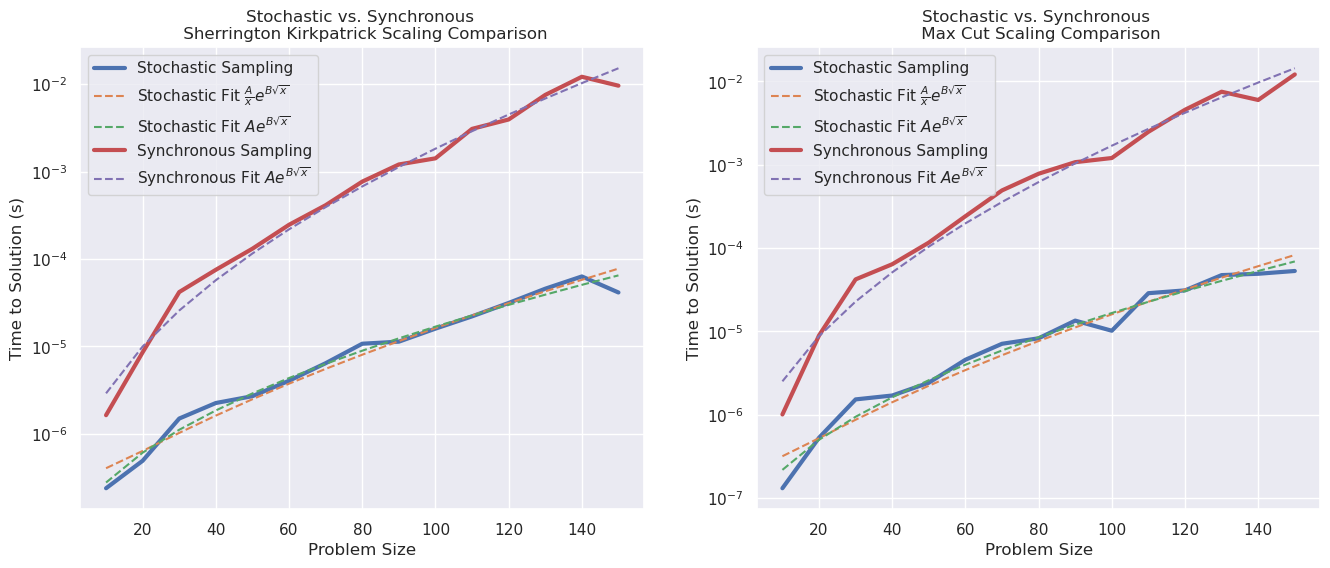

In [18]:

def sbm_func(x, a, b):
    return np.log(a/x) + (b * np.sqrt(x))

def bm_func(x, a, b):
    # return np.log(a*x)  +  b * np.sqrt(x)
    return np.log(a)  +  b * np.sqrt(x)

popt_sbm_sk, _ = curve_fit(sbm_func, SBM_scaling_SK["n"], np.log(SBM_mintime_SK))
popt_sbm_sk_2, _ = curve_fit(bm_func, SBM_scaling_SK["n"], np.log(SBM_mintime_SK))
popt_bm_sk, _ = curve_fit(bm_func, BM_scaling_SK["n"], np.log(BM_mintime_SK))

fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].semilogy(SBM_scaling_SK["n"], SBM_mintime_SK, label="Stochastic Sampling", linewidth=3)
ax[0].semilogy(SBM_scaling_SK["n"], np.exp(sbm_func(SBM_scaling_SK["n"], popt_sbm_sk[0], popt_sbm_sk[1])), linestyle="--", label=r"Stochastic Fit $\frac{A}{x}e^{B\sqrt{x}}$")
ax[0].semilogy(SBM_scaling_SK["n"], np.exp(bm_func(SBM_scaling_SK["n"], popt_sbm_sk_2[0], popt_sbm_sk_2[1])), linestyle="--", label=r"Stochastic Fit $Ae^{B\sqrt{x}}$")

print("Trials:", SBM_scaling_SK['trials'])

ax[0].semilogy(BM_scaling_SK["n"], BM_mintime_SK, label="Synchronous Sampling", linewidth=3)
ax[0].semilogy(BM_scaling_SK["n"], np.exp(bm_func(BM_scaling_SK["n"], popt_bm_sk[0], popt_bm_sk[1])), linestyle="--", label=r"Synchronous Fit $Ae^{B\sqrt{x}}$")


ax[0].set_title("Stochastic vs. Synchronous \n Sherrington Kirkpatrick Scaling Comparison", fontsize=12)
ax[0].set_xlabel("Problem Size")
ax[0].set_ylabel("Time to Solution (s)")
ax[0].legend()



popt_sbm_mc, _ = curve_fit(sbm_func, SBM_scaling_MC["n"], np.log(SBM_mintime_MC))
popt_sbm_mc_2, _ = curve_fit(bm_func, SBM_scaling_MC["n"], np.log(SBM_mintime_MC))
popt_bm_mc, _ = curve_fit(bm_func, BM_scaling_MC["n"], np.log(BM_mintime_MC))


ax[1].semilogy(SBM_scaling_MC["n"], SBM_mintime_MC, label="Stochastic Sampling", linewidth=3)
ax[1].semilogy(SBM_scaling_MC["n"], np.exp(sbm_func(SBM_scaling_MC["n"], popt_sbm_mc[0], popt_sbm_mc[1])), linestyle="--", label=r"Stochastic Fit $\frac{A}{x}e^{B\sqrt{x}}$")
ax[1].semilogy(SBM_scaling_SK["n"], np.exp(bm_func(SBM_scaling_MC["n"], popt_sbm_mc_2[0], popt_sbm_mc_2[1])), linestyle="--", label=r"Stochastic Fit $Ae^{B\sqrt{x}}$")


ax[1].semilogy(BM_scaling_MC["n"], BM_mintime_MC, label="Synchronous Sampling", linewidth=3)
ax[1].semilogy(BM_scaling_MC["n"], np.exp(bm_func(BM_scaling_MC["n"], popt_bm_mc[0], popt_bm_mc[1])), linestyle="--", label=r"Synchronous Fit $Ae^{B\sqrt{x}}$")


ax[1].set_title("Stochastic vs. Synchronous \n Max Cut Scaling Comparison", fontsize=12)
ax[1].set_xlabel("Problem Size")
ax[1].set_ylabel("Time to Solution (s)")
ax[1].legend()

print(popt_sbm_sk)
print(popt_bm_sk)
print(popt_sbm_sk[0]/popt_bm_sk[0])
print(popt_sbm_sk[1]/popt_bm_sk[1])


print("\n\n")

print(popt_sbm_mc)
print(popt_bm_mc)
print(popt_sbm_mc[0]/popt_bm_mc[0])
print(popt_sbm_mc[1]/popt_bm_mc[1])

print("\n\n")
# plt.savefig("SK_MC_scaling_fit.pdf", bbox_inches="tight")

In [19]:
"""
Now we are trying to do some bootstrap magic to find intervals for the medians
"""
fclk = 150e6 #Frequency in Mhz
samp_ind = -1

num_bootstraps = 50


@njit(cache=True)
def calc_pcorr_boot(pcorr, temps, samps, n, prob_id, solns, trials=1000, num_bootstraps=10, eps=1e-6):
    print(solns.shape)
    for boot in range(num_bootstraps):
        # print("Boot:", boot)
        for i, _ in enumerate(temps):
            for j, _ in enumerate(samps):
                for k, _ in enumerate(n):
                    for l, _ in enumerate(prob_id):
                        #This produces a random sample of the values for each problem, giving a bootstrap resampling of the 
                        pcorr[i, j, k, l, boot] = np.count_nonzero(np.random.choice(solns[i, j, k, l], size=trials) > (1 - eps)) / trials
    return pcorr



SBM_pcorr_SK = np.zeros([*(SBM_scaling_SK['solns'].shape[:-1]), num_bootstraps])
SBM_pcorr_SK = calc_pcorr_boot(SBM_pcorr_SK, temps=SBM_scaling_SK['temperature'], samps=SBM_scaling_SK['samps'], 
                          n=SBM_scaling_SK['n'], prob_id=SBM_scaling_SK['prob_id'], solns=SBM_scaling_SK['solns'], trials=SBM_scaling_SK['trials'], num_bootstraps=num_bootstraps)


BM_pcorr_SK = np.zeros([*(BM_scaling_SK['solns'].shape[:-1]), num_bootstraps])
BM_pcorr_SK = calc_pcorr_boot(BM_pcorr_SK, temps=BM_scaling_SK['temperature'], samps=BM_scaling_SK['samps'], 
                          n=BM_scaling_SK['n'], prob_id=BM_scaling_SK['prob_id'], solns=BM_scaling_SK['solns'], trials=BM_scaling_SK['trials'], num_bootstraps=num_bootstraps)


SBM_pcorr_MC = np.zeros([*(SBM_scaling_MC['solns'].shape[:-1]), num_bootstraps])
SBM_pcorr_MC = calc_pcorr_boot(SBM_pcorr_MC, temps=SBM_scaling_MC['temperature'], samps=SBM_scaling_MC['samps'], 
                          n=SBM_scaling_MC['n'], prob_id=SBM_scaling_MC['prob_id'], solns=SBM_scaling_MC['solns'], trials=SBM_scaling_MC['trials'], num_bootstraps=num_bootstraps)

BM_pcorr_MC = np.zeros([*(BM_scaling_MC['solns'].shape[:-1]), num_bootstraps])
BM_pcorr_MC = calc_pcorr_boot(BM_pcorr_MC, temps=BM_scaling_MC['temperature'], samps=BM_scaling_MC['samps'], 
                          n=BM_scaling_MC['n'], prob_id=BM_scaling_MC['prob_id'], solns=BM_scaling_MC['solns'], trials=BM_scaling_MC['trials'], num_bootstraps=num_bootstraps)


SBM_pcorr_SK = np.maximum(SBM_pcorr_SK, 1e-12)
SBM_tsoln_SK = np.log(0.01) / (np.log(1 - SBM_pcorr_SK))
SBM_tsoln_SK = np.maximum(SBM_tsoln_SK, 1)

# SBM_tsoln_SK = np.min()
for i, samp in enumerate(SBM_scaling_SK['samps']):
    SBM_tsoln_SK[:, i, :, :] = samp / fclk * SBM_tsoln_SK[:, i, :, :]



BM_pcorr_SK = np.maximum(BM_pcorr_SK, 1e-12)
BM_tsoln_SK = np.log(0.01) / (np.log(1 - BM_pcorr_SK))
BM_tsoln_SK = np.maximum(BM_tsoln_SK, 1)
for i, samp in enumerate(SBM_scaling_SK['samps']):
    BM_tsoln_SK[:, i, :, :] = samp / fclk * BM_tsoln_SK[:, i, :, :]



SBM_pcorr_MC = np.maximum(SBM_pcorr_MC, 1e-12)
SBM_tsoln_MC = np.log(0.01) / (np.log(1 - SBM_pcorr_MC))
SBM_tsoln_MC = np.maximum(SBM_tsoln_MC, 1)

# SBM_tsoln_SK = np.min()
for i, samp in enumerate(SBM_scaling_MC['samps']):
    SBM_tsoln_MC[:, i, :, :] = samp / fclk * SBM_tsoln_MC[:, i, :, :]

BM_pcorr_MC = np.maximum(BM_pcorr_MC, 1e-12)
BM_tsoln_MC = np.log(0.01) / (np.log(1 - BM_pcorr_MC))
BM_tsoln_MC = np.maximum(BM_tsoln_MC, 1)

# SBM_tsoln_SK = np.min()
for i, samp in enumerate(BM_scaling_MC['samps']):
    BM_tsoln_MC[:, i, :, :] = samp / fclk * BM_tsoln_MC[:, i, :, :]

(7, 16, 15, 10, 100)
(7, 16, 15, 10, 100)
(8, 16, 15, 10, 100)
(8, 16, 15, 10, 100)


/tmp/ipykernel_18827/3431460394.py:45: RuntimeWarning: divide by zero encountered in log
  SBM_tsoln_SK = np.log(0.01) / (np.log(1 - SBM_pcorr_SK))
/tmp/ipykernel_18827/3431460394.py:55: RuntimeWarning: divide by zero encountered in log
  BM_tsoln_SK = np.log(0.01) / (np.log(1 - BM_pcorr_SK))
/tmp/ipykernel_18827/3431460394.py:63: RuntimeWarning: divide by zero encountered in log
  SBM_tsoln_MC = np.log(0.01) / (np.log(1 - SBM_pcorr_MC))
/tmp/ipykernel_18827/3431460394.py:71: RuntimeWarning: divide by zero encountered in log
  BM_tsoln_MC = np.log(0.01) / (np.log(1 - BM_pcorr_MC))


In [20]:
# fig, ax = plt.subplots()
sbm_sk_params = []
sbm_sk_params_2 = []
bm_sk_params = []
sbm_mc_params = []
sbm_mc_params_2 = []
bm_mc_params = []
SBM_mintime_SK_list = []
SBM_mintime_MC_list = []
BM_mintime_SK_list = []
BM_mintime_MC_list = []

for i in range(num_bootstraps):
    SBM_mintime_SK = np.min(np.median(SBM_tsoln_SK[:, :, :, :, i], axis=3), axis=(0, 1))
    SBM_mintime_MC = np.min(np.median(SBM_tsoln_MC[:, :, :, :, i], axis=3), axis=(0, 1))
    BM_mintime_SK = np.min(np.median(BM_tsoln_SK[:, :, :, :, i], axis=3), axis=(0, 1))
    BM_mintime_MC = np.min(np.median(BM_tsoln_MC[:, :, :, :, i], axis=3), axis=(0, 1))

    SBM_mintime_SK_list.append(SBM_mintime_SK)
    SBM_mintime_MC_list.append(SBM_mintime_MC)
    BM_mintime_SK_list.append(BM_mintime_SK)
    BM_mintime_MC_list.append(BM_mintime_MC)

    popt_sbm_sk, _ = curve_fit(sbm_func, SBM_scaling_SK["n"], np.log(SBM_mintime_SK))
    popt_sbm_mc, _ = curve_fit(sbm_func, SBM_scaling_MC["n"], np.log(SBM_mintime_MC))
    popt_sbm_sk_2, _ = curve_fit(bm_func, SBM_scaling_SK["n"], np.log(SBM_mintime_SK))
    popt_sbm_mc_2, _ = curve_fit(bm_func, SBM_scaling_MC["n"], np.log(SBM_mintime_MC))
    popt_bm_sk, _ = curve_fit(bm_func, BM_scaling_SK["n"], np.log(BM_mintime_SK))
    popt_bm_mc, _ = curve_fit(bm_func, BM_scaling_MC["n"], np.log(BM_mintime_MC))

    sbm_sk_params.append(popt_sbm_sk)
    sbm_mc_params.append(popt_sbm_mc)
    sbm_sk_params_2.append(popt_sbm_sk_2)
    sbm_mc_params_2.append(popt_sbm_mc_2)
    bm_sk_params.append(popt_bm_sk) 
    bm_mc_params.append(popt_bm_mc)

    # ax.semilogy(SBM_scaling_SK["n"], SBM_mintime_SK, label=f"Asynchronous Sampling, run{i}")
    # ax.semilogy(SBM_scaling_SK["n"], np.exp(sbm_func(SBM_scaling_SK["n"], popt_sbm_sk[0], popt_sbm_sk[1])), linestyle="--", label=(r"ASynchronous Fit $Ae^{B\sqrt{x}}$ run:" + str(i)))

    # ax.semilogy(BM_scaling_SK["n"], BM_mintime_SK, label="Synchronous Sampling", linewidth=3)
    # ax.semilogy(BM_scaling_SK["n"], np.exp(bm_func(BM_scaling_SK["n"], popt_bm_sk[0], popt_bm_sk[1])), linestyle="--", label=r"Synchronous Fit $Axe^{B\sqrt{x}}$")

    # ax.semilogy(SBM_scaling_SK["n"], SBM_mintime_SK, label=f"Asynchronous Sampling, run{i}")
    # print(popt_sbm_sk)


/tmp/ipykernel_18827/1435759097.py:4: RuntimeWarning: invalid value encountered in log
  return np.log(a/x) + (b * np.sqrt(x))
/tmp/ipykernel_18827/1435759097.py:8: RuntimeWarning: invalid value encountered in log
  return np.log(a)  +  b * np.sqrt(x)


(50, 15)
(50, 15)


/tmp/ipykernel_18827/1435759097.py:4: RuntimeWarning: invalid value encountered in log
  return np.log(a/x) + (b * np.sqrt(x))
/tmp/ipykernel_18827/1435759097.py:8: RuntimeWarning: invalid value encountered in log
  return np.log(a)  +  b * np.sqrt(x)


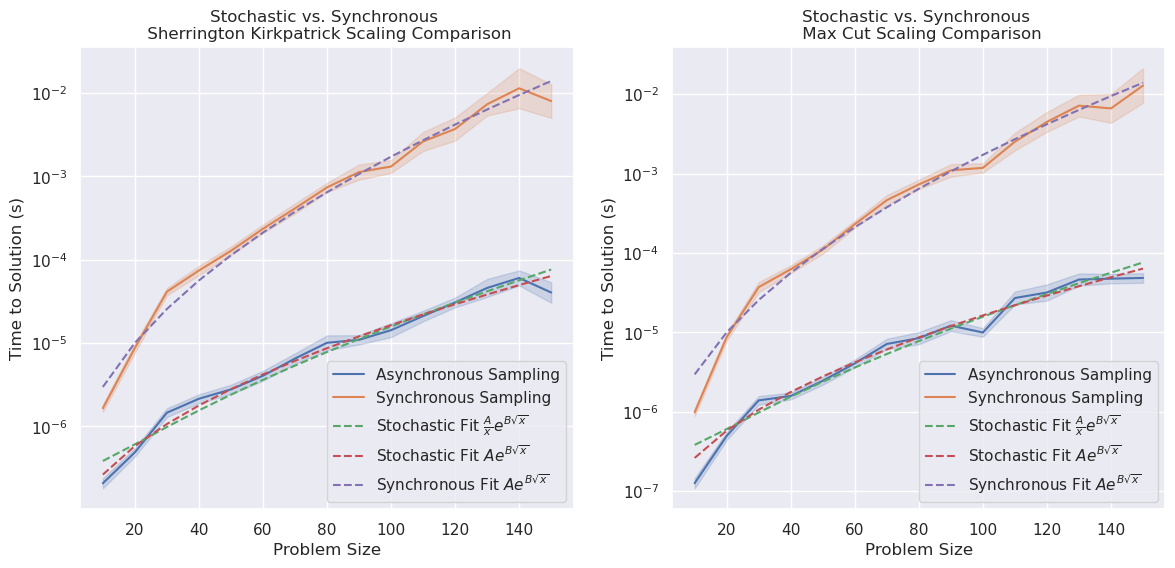

In [21]:
print(np.array(SBM_mintime_SK_list).shape)
print(np.tile(SBM_scaling_SK["n"], (num_bootstraps,1)).shape)

SBM_mintime_SK_list = np.array(SBM_mintime_SK_list)
BM_mintime_SK_list = np.array(BM_mintime_SK_list)

SBM_mintime_MC_list = np.array(SBM_mintime_MC_list)
BM_mintime_MC_list = np.array(BM_mintime_MC_list)

popt_sbm_sk, _ = curve_fit(sbm_func, SBM_scaling_SK["n"], np.log(np.mean(SBM_mintime_SK_list, axis=0)))
popt_sbm_sk_2, _ = curve_fit(bm_func, SBM_scaling_SK["n"], np.log(np.mean(SBM_mintime_SK_list, axis=0)))
popt_bm_sk, _ = curve_fit(bm_func, BM_scaling_SK["n"], np.log(np.mean(BM_mintime_SK_list, axis=0)))

popt_sbm_mc, _ = curve_fit(sbm_func, SBM_scaling_SK["n"], np.log(np.mean(SBM_mintime_SK_list, axis=0)))
popt_sbm_mc_2, _ = curve_fit(bm_func, SBM_scaling_SK["n"], np.log(np.mean(SBM_mintime_SK_list, axis=0)))
popt_bm_mc, _ = curve_fit(bm_func, BM_scaling_SK["n"], np.log(np.mean(BM_mintime_SK_list, axis=0)))

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(14, 6))
ax[0].set(yscale="log")
ax[1].set(yscale="log")
sns.lineplot(x=np.tile(SBM_scaling_SK["n"], (num_bootstraps)).flatten(), y=np.array(SBM_mintime_SK_list).flatten(), errorbar=("sd", 2), ax=ax[0], label="Asynchronous Sampling")
sns.lineplot(x=np.tile(SBM_scaling_SK["n"], (num_bootstraps)).flatten(), y=np.array(BM_mintime_SK_list).flatten(), errorbar=("sd", 2), ax=ax[0], label="Synchronous Sampling")


ax[0].semilogy(SBM_scaling_SK["n"], np.exp(sbm_func(SBM_scaling_SK["n"], popt_sbm_sk[0], popt_sbm_sk[1])), linestyle="--", label=r"Stochastic Fit $\frac{A}{x}e^{B\sqrt{x}}$")
ax[0].semilogy(SBM_scaling_SK["n"], np.exp(bm_func(SBM_scaling_SK["n"], popt_sbm_sk_2[0], popt_sbm_sk_2[1])), linestyle="--", label=r"Stochastic Fit $Ae^{B\sqrt{x}}$")
ax[0].semilogy(BM_scaling_SK["n"], np.exp(bm_func(BM_scaling_SK["n"], popt_bm_sk[0], popt_bm_sk[1])), linestyle="--", label=r"Synchronous Fit $Ae^{B\sqrt{x}}$")


ax[0].set_title("Stochastic vs. Synchronous \n Sherrington Kirkpatrick Scaling Comparison", fontsize=12)
ax[0].set_xlabel("Problem Size")
ax[0].set_ylabel("Time to Solution (s)")
ax[0].legend()



sns.lineplot(x=np.tile(SBM_scaling_MC["n"], (num_bootstraps)).flatten(), y=np.array(SBM_mintime_MC_list).flatten(), errorbar=("sd", 2), ax=ax[1], label="Asynchronous Sampling")
sns.lineplot(x=np.tile(SBM_scaling_MC["n"], (num_bootstraps)).flatten(), y=np.array(BM_mintime_MC_list).flatten(), errorbar=("sd", 2), ax=ax[1], label="Synchronous Sampling")

ax[1].semilogy(SBM_scaling_MC["n"], np.exp(sbm_func(SBM_scaling_MC["n"], popt_sbm_mc[0], popt_sbm_mc[1])), linestyle="--", label=r"Stochastic Fit $\frac{A}{x}e^{B\sqrt{x}}$")
ax[1].semilogy(SBM_scaling_SK["n"], np.exp(bm_func(SBM_scaling_MC["n"], popt_sbm_mc_2[0], popt_sbm_mc_2[1])), linestyle="--", label=r"Stochastic Fit $Ae^{B\sqrt{x}}$")
ax[1].semilogy(BM_scaling_MC["n"], np.exp(bm_func(BM_scaling_MC["n"], popt_bm_mc[0], popt_bm_mc[1])), linestyle="--", label=r"Synchronous Fit $Ae^{B\sqrt{x}}$")



ax[1].set_title("Stochastic vs. Synchronous \n Max Cut Scaling Comparison", fontsize=12)
ax[1].set_xlabel("Problem Size")
ax[1].set_ylabel("Time to Solution (s)")
ax[1].legend()




# plt.savefig("SK_MC_scaling_fit.pdf", bbox_inches="tight")

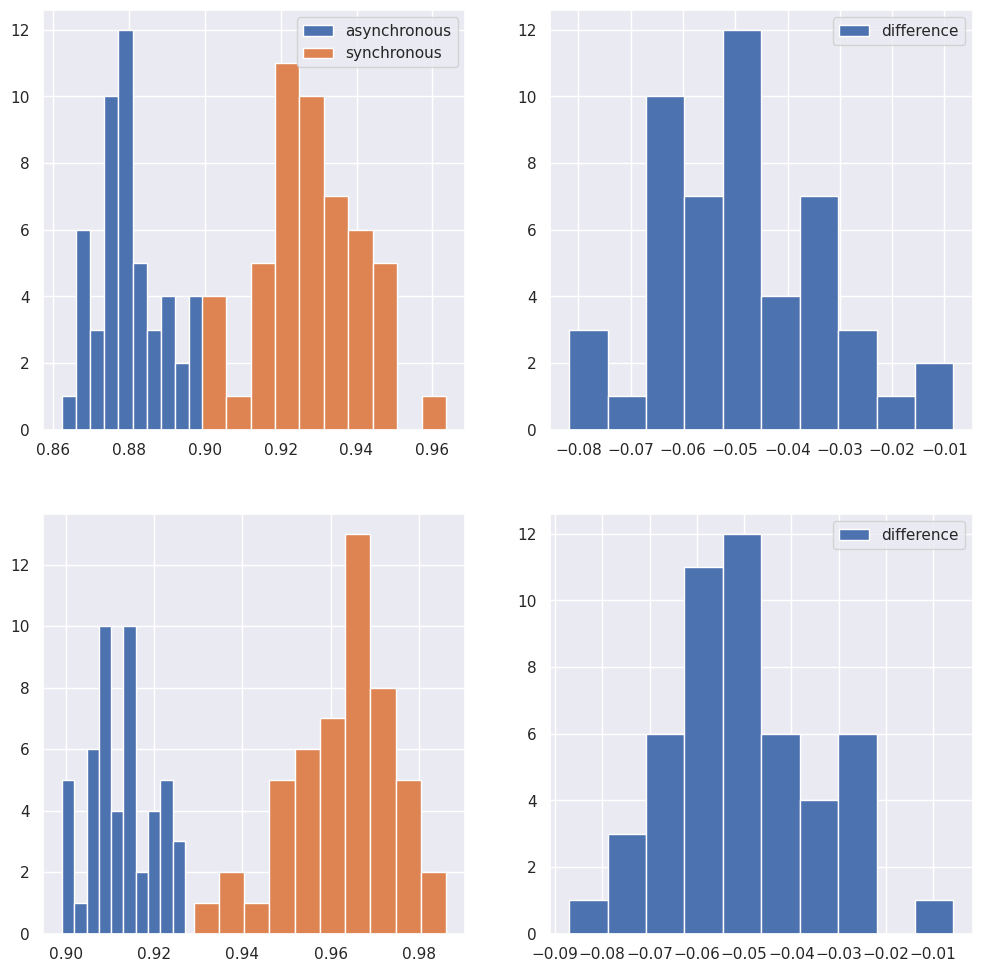

In [22]:
sbm_sk_params = np.array(sbm_sk_params)
sbm_sk_params_2 = np.array(sbm_sk_params_2)
bm_sk_params = np.array(bm_sk_params)
sbm_mc_params = np.array(sbm_mc_params)
sbm_mc_params_2 = np.array(sbm_mc_params_2)
bm_mc_params = np.array(bm_mc_params)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
ax[0,0].hist(sbm_sk_params[:, 1], bins=10, label="asynchronous")
ax[0,0].hist(bm_sk_params[:, 1], bins=10, label="synchronous")
ax[0,0].legend()
ax[0,1].hist(sbm_sk_params[:, 1] - bm_sk_params[:, 1], bins=10, label="difference")
ax[0,1].legend()


ax[1, 0].hist(sbm_mc_params[:, 1], bins=10, label="asynchronous")
ax[1, 0].hist(bm_mc_params[:, 1], bins=10, label="synchronous")

ax[1,1].hist(sbm_mc_params[:, 1] - bm_mc_params[:, 1], bins=10, label="difference")

ax[1,1].legend()


In [23]:
print("SK Params Exponential Parameter 95\% Confidence Interval Comparison")
print(np.quantile(sbm_sk_params[:, 1], q=0.025), np.quantile(sbm_sk_params[:, 1], q=0.975))
print(np.quantile(sbm_sk_params_2[:, 1], q=0.025), np.quantile(sbm_sk_params_2[:, 1], q=0.975))
print(np.quantile(bm_sk_params[:, 1], q=0.025), np.quantile(bm_sk_params[:, 1], q=0.975))
med = np.quantile(bm_sk_params[:, 1], q=0.5)
min = np.quantile(bm_sk_params[:, 1], q=0.025)
print(med)

print("SK Exponential Parameter Confidence Interval Test")
sk_exp_diff = sbm_sk_params[:, 1] - bm_sk_params[:, 1]
print(np.quantile(sk_exp_diff, q=0.025), np.quantile(sk_exp_diff, q=0.99))



print("MC Params Exponential Parameter 95\% Confidence Interval Comparison")
print(np.quantile(sbm_mc_params[:, 1], q=0.025), np.quantile(sbm_mc_params[:, 1], q=0.975))
print(np.quantile(sbm_mc_params_2[:, 1], q=0.025), np.quantile(sbm_mc_params_2[:, 1], q=0.975))
print(np.quantile(bm_mc_params[:, 1], q=0.025), np.quantile(bm_mc_params[:, 1], q=0.975))

print("SK Params Linear Parameter 95\% Confidence Interval Comparison")
print(np.quantile(sbm_sk_params[:, 0], q=0.025), np.quantile(sbm_sk_params[:, 0], q=0.975))
print(np.quantile(sbm_sk_params_2[:, 0], q=0.025), np.quantile(sbm_sk_params_2[:, 0], q=0.975))
print(np.quantile(bm_sk_params[:, 0], q=0.025), np.quantile(bm_sk_params[:, 0], q=0.975))

print("MC Params Linear Parameter 95\% Confidence Interval Comparison")
print(np.quantile(sbm_mc_params[:, 0], q=0.025), np.quantile(sbm_mc_params[:, 0], q=0.975))
print(np.quantile(sbm_mc_params_2[:, 0], q=0.025), np.quantile(sbm_mc_params_2[:, 0], q=0.975))
print(np.quantile(bm_mc_params[:, 0], q=0.025), np.quantile(bm_mc_params[:, 0], q=0.975))

SK Params Exponential Parameter 95\% Confidence Interval Comparison
0.866452748005949 0.8986538645822446
0.590248012544545 0.6224491294930141
0.8996020681867521 0.9483422585495805
0.9286066634759191
SK Exponential Parameter Confidence Interval Test
-0.07623094350203366 -0.00971098899965662
MC Params Exponential Parameter 95\% Confidence Interval Comparison
0.9006672855368103 0.926058787511583
0.6244625503799539 0.649854052853455
0.9369926131853508 0.9806190767878764
SK Params Linear Parameter 95\% Confidence Interval Comparison
2.0160218991837107e-07 2.6191224060114396e-07
3.312351688228289e-08 4.3032547841367663e-08
1.3493292148003913e-07 1.9427710507423674e-07
MC Params Linear Parameter 95\% Confidence Interval Comparison
1.4882926792468864e-07 1.8692892887415354e-07
2.4452855647653542e-08 3.07126823364754e-08
9.958817759842625e-08 1.3265571001410172e-07


3.6 0.7999999999999998 1.335642075593239e-05
2.6 0.7999999999999998 2.9e-05
1.6 0.7999999999999998 3e-05
0.6000000000000001 0.7999999999999998 0.0006
-0.3999999999999999 0.7999999999999998 0.003


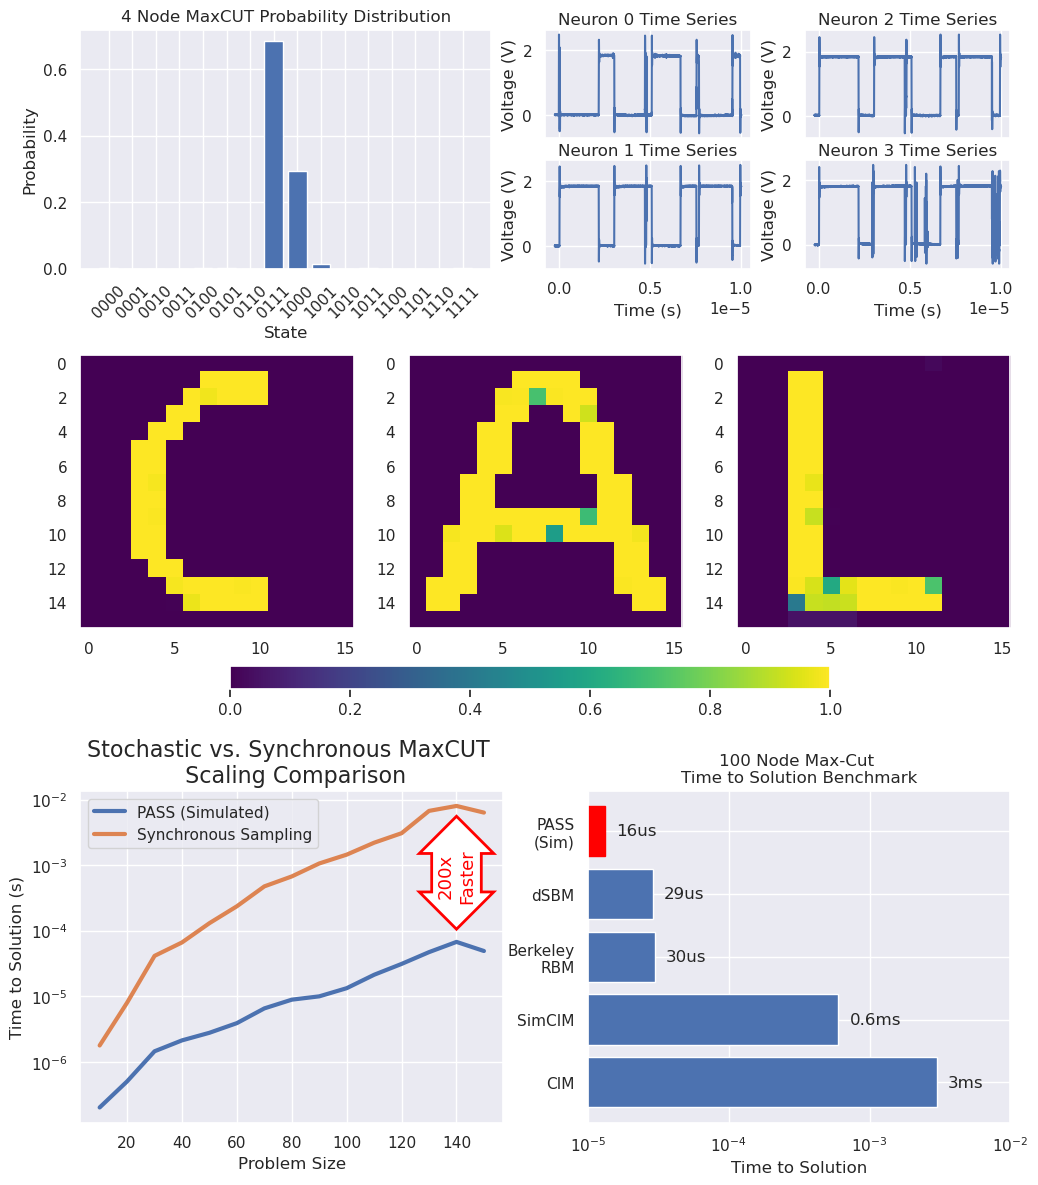

In [24]:
super_fig = plt.figure(figsize=(12, 12))
subfigs = super_fig.subfigures(nrows=3, ncols=1, 
                               height_ratios=[0.8, 1.2, 0.9], hspace=0.1)

cut_fig = subfigs[0]

widths = [2, 1, 1]
gs = cut_fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths)

# cut_fig.subplots_adjust()

for i in range(4):
    ax = cut_fig.add_subplot(gs[i%2, i//2 + 1])
    ax.plot(output[0], output[i+1])
    ax.set_ylabel("Voltage (V)")
    # ax.text(x=0.8e-5, y=0.8, s="Node {0}".format(i), color="R", fontsize=12, fontweight="bold")
    ax.set_title("Neuron {0} Time Series".format(i), y=0.97)
    if i%2 == 0:
        ax.tick_params('x', labelbottom=False)
    else:
        ax.ticklabel_format(axis='x', scilimits=(0,0))
        ax.set_xlabel("Time (s)")


bar_ax = cut_fig.add_subplot(gs[:, 0])

normalized_vals = np.array(list(avg_vals_cleaned.values()))/np.sum(list(avg_vals_cleaned.values()))
x=np.arange(2**4)
labels = list(avg_vals_cleaned.keys())
bar_ax.bar(x, height=normalized_vals)
bar_ax.set_xticks(x, minor=False)
bar_ax.set_xticklabels(labels, rotation=45)
bar_ax.set_xlabel("State")
bar_ax.set_ylabel("Probability")
bar_ax.set_title("4 Node MaxCUT Probability Distribution")

cal_fig = subfigs[1]
(ax0, ax1, ax2) = cal_fig.subplots(nrows=1, ncols=3)


im = ax0.imshow(out_dat_c, vmin=0, vmax=1, cmap=mpl.colormaps[cmap])
ax0.grid(visible=False)

#A generation
im = ax1.imshow(out_dat_a, vmin=0, vmax=1, cmap=mpl.colormaps[cmap])
ax1.grid(visible=False)

#L generation
im = ax2.imshow(out_dat_l, vmin=0, vmax=1, cmap=mpl.colormaps[cmap])
ax2.grid(visible=False)




cbar_ax = cal_fig.add_axes([0.25, 0.25, 0.5, 0.05])
cal_fig.colorbar(im, cax=cbar_ax, orientation="horizontal")
cal_fig.subplots_adjust(bottom=0.20, top=1.15)

scaling_fig = subfigs[2]

ax = scaling_fig.subplots(nrows=1, ncols=2)

ax[0].semilogy(SBM_scaling_SK["n"], SBM_mintime_SK, label="PASS (Simulated)", linewidth=3)
ax[0].semilogy(SBM_scaling_SK["n"], BM_mintime_SK, label="Synchronous Sampling", linewidth=3)
ax[0].set_title("Stochastic vs. Synchronous MaxCUT \n Scaling Comparison", fontsize=16)
ax[0].set_xlabel("Problem Size")
ax[0].set_ylabel("Time to Solution (s)")
ax[0].legend()

# ax[0].arrow(x=140, dx=0, y=1e-4, )
# ax[0].annotate("", xy=(140, 1e-4), xytext=(140, 1e-2), xycoords='data', 
#                horizontalalignment='center', verticalalignment='top',
#                arrowprops=dict(linewidth=4, color='red', arrowstyle="<->"))

bbox_props = dict(boxstyle="darrow,pad=0.3", fc="white", ec="red", lw=2)
t = ax[0].text(140, 0.7e-3, "200x\nFaster", ha="center", va="center", color="red", rotation=90,
            size=13,
            bbox=bbox_props)

y = list(reversed(np.arange(5)))
N100_val = SBM_mintime_SK[np.where(SBM_scaling_SK['n'] == 100)[0][0]]

vals = [N100_val, 29e-6, 30e-6, 0.6e-3, 3e-3]
labels = ["PASS\n(Sim)", "dSBM", "Berkeley\nRBM", "SimCIM", "CIM"]
ax[1].barh(y, vals)
ax[1].set_yticks(y, minor=False)
ax[1].set_yticklabels(labels)
ax[1].set_xlim([1e-5, 1e-2])
ax[1].set_xscale("log")
ax[1].set_title("100 Node Max-Cut \nTime to Solution Benchmark")
ax[1].set_xlabel("Time to Solution")

rects = ax[1].patches
value_labels = ["16us", "29us", "30us", "0.6ms", "3ms"]

rects[0].set_color("red")

for rect, label in zip(rects, value_labels):
    width = rect.get_width()
    print(rect.get_y(), rect.get_height(), width)
    ax[1].text(
        width+width/5, rect.get_y() + rect.get_height() / 2, label, ha="left", va="center"
    )
# plt.savefig("maxcut_raw.pdf",bbox_inches="tight")

In [25]:
with open("data/all_digits_231121.p", "rb") as fp:
    digit_output_data = pickle.load(fp)

print(digit_output_data)

[{'generated_samples': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [

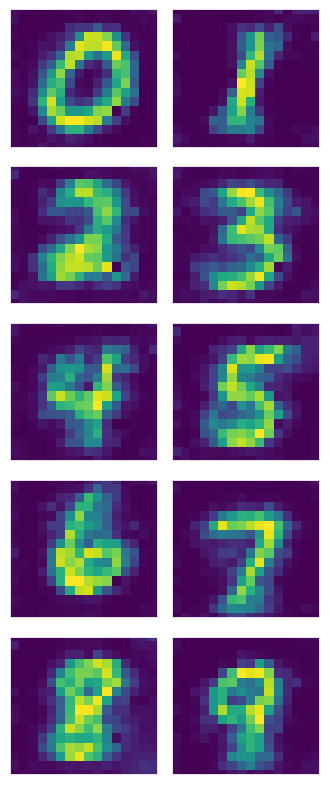

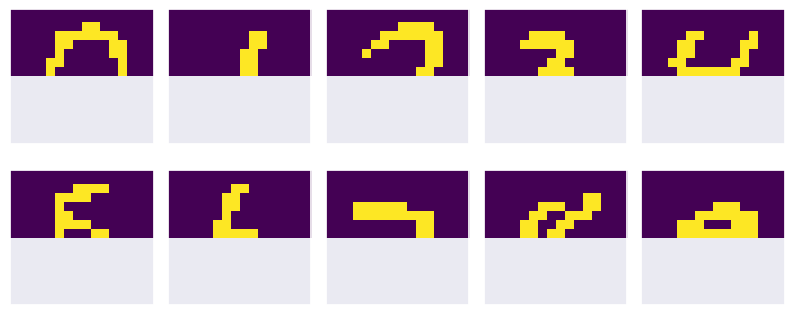

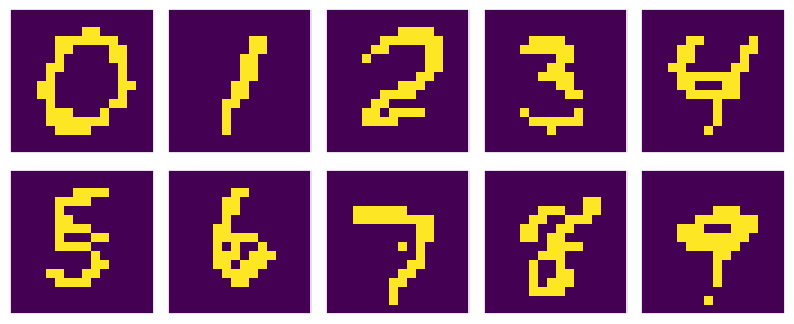

In [26]:
#Average Trained value


fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(4, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.flatten()
for i, dig in enumerate(digit_output_data):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylim([15, 0])
    ax[i].imshow(dig["full_data"], cmap=mpl.colormaps[cmap])
# plt.savefig("avg_act.pdf", bbox_inches="tight")

#Initialized Half Digits
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.flatten()
for i, dig in enumerate(digit_output_data):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylim([15, 0])
    ax[i].imshow(dig["clamp_image"][:8], cmap=mpl.colormaps[cmap])
# plt.savefig("half_digits.pdf", bbox_inches="tight")

#Filled in Digits
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.flatten()
for i, dig in enumerate(digit_output_data):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(dig["generated_samples"][-5], cmap=mpl.colormaps[cmap])

# plt.savefig("generated_digits.pdf", bbox_inches="tight")

Max Speed Difference:181.2975
Power Difference @ max neurons:132.85211267605632


Text(0.5, 1.0, 'Comparison of Per Sample Power \n for Expectation Estimation')

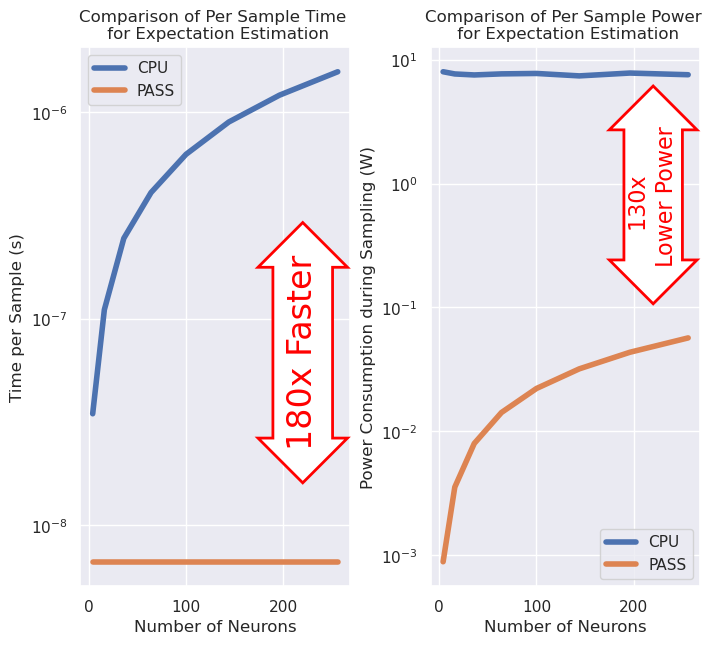

In [33]:
#Time per sample for C++ version of PASS (gibbs sampler)
# x_dim = np.array([4, 6, 8, 10, 12, 14, 16, 24, 32, 40, 48, 64])
x_dim = np.array([2, 4, 6, 8, 10, 12, 14, 16])
num_neurons = x_dim**2
#PASS per neuron speed
pass_speed = 1/(150e6)
#PASS power consumption for 256 neurons
pass_power = 56.8e-3

time_per_samp_cpu = np.array([3.46971e-08, 1.10654e-07, 2.45219e-07, 4.08401e-07, 6.25501e-07, 8.9691e-07, 1.20865e-06, 1.56986e-06])
num_neurons_pass = np.array([2, 4, 6, 8, 10, 12, 14, 16])**2
time_per_samp_pass = np.array([pass_speed] * len(num_neurons_pass))

last_val = len(num_neurons_pass)-1

fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))
fig.subplots_adjust(wspace=0.3)
max_diff_speed = time_per_samp_cpu[last_val-1]/time_per_samp_pass[last_val-1]
print("Max Speed Difference:{0}".format(max_diff_speed))

ax0.semilogy(num_neurons, time_per_samp_cpu, label="CPU", linewidth=4)
ax0.semilogy(num_neurons_pass, time_per_samp_pass, label="PASS", linewidth=4)
ax0.set_xlabel("Number of Neurons")
ax0.set_ylabel("Time per Sample (s)")
ax0.set_title("Comparison of Per Sample Time \n for Expectation Estimation")
ax0.legend()
bbox_props = dict(boxstyle="darrow,pad=0.4", fc="white", ec="red", lw=2)
t = ax0.text(220, 2*np.min(time_per_samp_cpu), f"{round(max_diff_speed,-1):.0f}x Faster", ha="center", va="center", color="red", rotation=90,
            size=24,
            bbox=bbox_props)


cpu_power = np.array([8.04, 7.72, 7.58, 7.73, 7.79, 7.45, 7.85, 7.61]) #Power during computation (single threaded case)
baseline_power = 0.064 #Power extracted before computation

pass_power_neurons = (pass_power / 256) * num_neurons

min_diff_power = np.min((cpu_power - baseline_power)/pass_power_neurons)

ax1.semilogy(num_neurons, cpu_power - baseline_power, label="CPU", linewidth=4)
ax1.semilogy(num_neurons, pass_power_neurons, label="PASS", linewidth=4)
ax1.legend()

bbox_props = dict(boxstyle="darrow,pad=0.2", fc="white", ec="red", lw=2)
t = ax1.text(220, 0.1*np.min(cpu_power), f"{round(min_diff_power,-1):.0f}x \n Lower Power", ha="center", va="center", color="red", rotation=90,
            size=16,
            bbox=bbox_props)

print("Power Difference @ max neurons:{0}".format(min_diff_power))
ax1.set_xlabel("Number of Neurons")
ax1.set_ylabel("Power Consumption during Sampling (W)")
ax1.set_title("Comparison of Per Sample Power \n for Expectation Estimation")

# plt.savefig("CPUCompare_Gibbs.pdf", bbox_inches="tight")

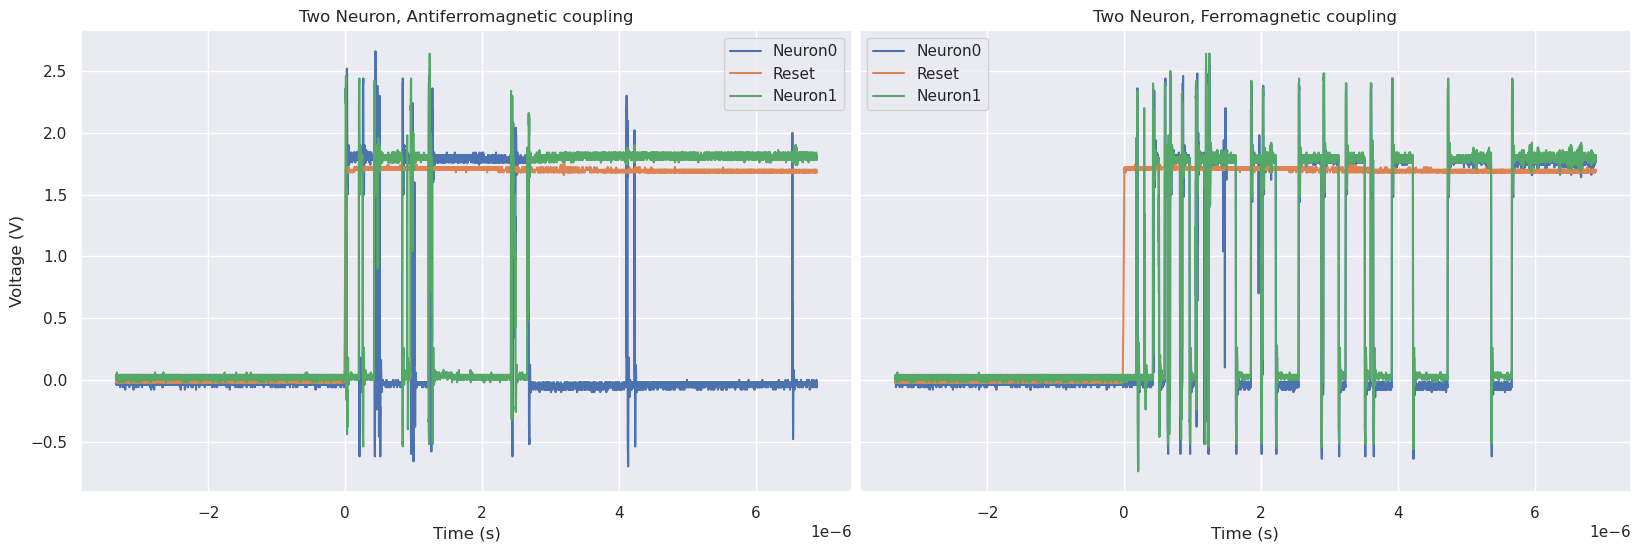

In [34]:
AFM = np.loadtxt("data/AFM.csv", delimiter=",", skiprows=2, usecols=(0, 1, 2, 3))
FM = np.loadtxt("data/FM.csv", delimiter=",", skiprows=2, usecols=(0, 1, 2, 3, 4))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.01)
ax1.plot(AFM[:, 0], AFM[:, 1], label="Neuron0")
ax1.plot(AFM[:, 0], AFM[:, 2], label="Reset")
ax1.plot(AFM[:, 0], AFM[:, 3], label="Neuron1")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Voltage (V)")
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax1.set_title("Two Neuron, Antiferromagnetic coupling")
ax1.legend()


ax2.plot(AFM[:, 0], FM[:, 1], label="Neuron0")
# plt.plot(AFM[:, 0], FM[:, 2])
ax2.plot(AFM[:, 0], FM[:, 3], label="Reset")
ax2.plot(AFM[:, 0], FM[:, 4], label="Neuron1")
ax2.set_xlabel("Time (s)")
ax2.set_title("Two Neuron, Ferromagnetic coupling")
ax2.legend()
# plt.savefig("AFM_FM_time.pdf", bbox_inches="tight")

In [35]:
with open("data/activation_221017.p", "rb") as fp:
    data_dict = pickle.load(fp)
print(data_dict.keys())

dict_keys([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79])


In [36]:
def acf(x, length=20):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1] for i in range(1, length)])

[1.744 1.728 1.728 ... 1.728 1.744 1.728]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 8.63150493e-06 -4.61037502e+03]
 [-4.61037502e+03  1.47102071e+13]]


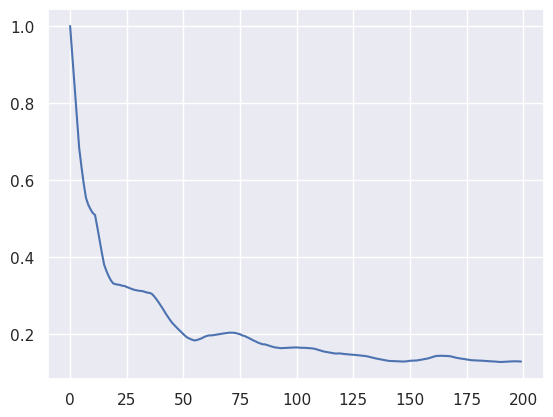

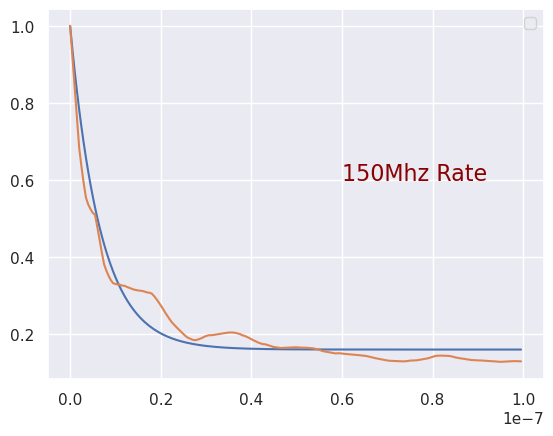

In [39]:
length = 200
ind = 0
min_index = 100
Vin = 0.49
print(data_dict[Vin][ind][2][min_index:-1])
acf_data = [acf(data_dict[Vin][ind][2][min_index:-1] > 0.9, length=length)]

for ind in range(1, 10):
    temp_acf_data = acf(data_dict[Vin][ind][2][min_index:-1] > 0.9, length=length)
    acf_data = np.append(acf_data, [temp_acf_data], axis=0)

    time_data = data_dict[Vin][ind][0][min_index:min_index + length]
    time_data = time_data - np.min(time_data)

avg_acf = np.average(acf_data, axis=0)
plt.plot(avg_acf)


def func(x, a, b):
    return a * np.exp(-b * x) + (1-a)

popt, pcov = curve_fit(func, time_data, avg_acf, p0=[0.8, 1e8])
print(pcov)


font = {'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots()
ax.plot(time_data, func(time_data, *popt))
ax.plot(time_data, avg_acf)
ax.text(x=0.6e-7, y=0.6, s="{0:.0f}Mhz Rate".format(popt[1]/(1e6)), fontdict=font)
ax.legend()

(10, 200)


Text(0.5, 1.0, 'Autocorrelation for Hardware Neuron')

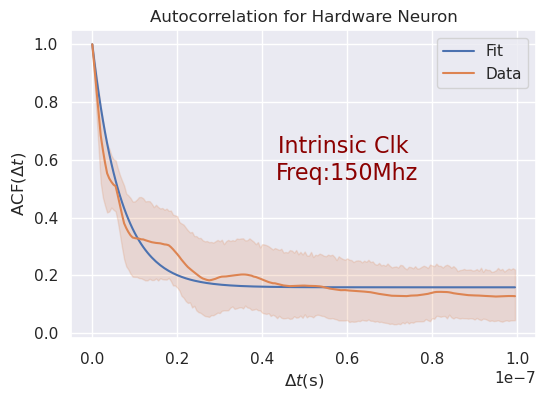

In [40]:
fig, ax = plt.subplots(figsize=(6, 4))
print(acf_data.shape)
df = pd.DataFrame(acf_data, columns=time_data).melt()


ax.plot(time_data, func(time_data, *popt), label="Exponential Fit")


sns.lineplot(x="variable", y="value", data=df, ax=ax)

ax.legend(["Fit", "Data"])

ax.text(x=0.6e-7, y=0.6, 
    s="Intrinsic Clk \nFreq:{0:.0f}Mhz".format(popt[1]/(1e6)), 
    horizontalalignment='center', 
    verticalalignment='center', 
    fontdict=font)

ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0))
ax.set_xlabel("$\Delta t$(s)")
ax.set_ylabel("ACF($\Delta t$)")
ax.set_title("Autocorrelation for Hardware Neuron")
# plt.savefig("acf.pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Sigmoidal Activation Function (averaged)')

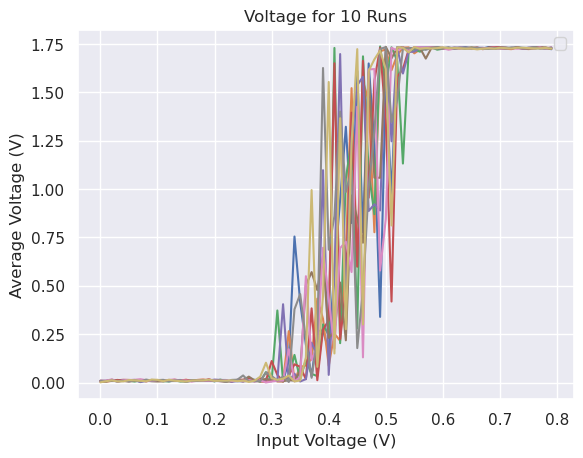

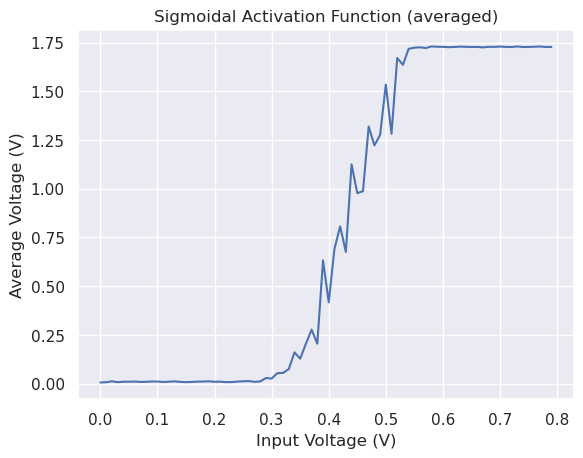

In [60]:
neuron_runs = []
for ind in range(1, 10):
    avg_volt = []
    for Vin in data_dict.keys():
        avg_volt.append(np.average(data_dict[Vin][ind][2][min_index:-1]))
    neuron_runs.append(avg_volt)

    plt.plot(data_dict.keys(), avg_volt)

plt.legend()
plt.xlabel("Input Voltage (V)")
plt.ylabel("Average Voltage (V)")
plt.title("Voltage for 10 Runs")
# plt.savefig("avg_volt.pdf", bbox_inches="tight")

plt.figure()
plt.plot(data_dict.keys(), np.average(np.array(neuron_runs), axis=0))
plt.xlabel("Input Voltage (V)")
plt.ylabel("Average Voltage (V)")
plt.title("Sigmoidal Activation Function (averaged)")
# plt.savefig("avg_volt.pdf", bbox_inches="tight")

